In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from numpy.random import default_rng
import seaborn as sns
import pandas as pd
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from numpy.random import default_rng
import seaborn as sns
import pandas as pd
import itertools
import numpy as np
from numpy.random import default_rng
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from matplotlib.dates import MonthLocator

# One example: 

### https://github.com/nytimes/covid-19-data

In [5]:
# Replace 'your_dataset.csv' with the actual file name and path
file_path = 'us.csv'

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())
# Replace 'your_dataset.csv' with the actual file name and path
file_path2 = 'us-counties-2020.csv'

# Load the dataset into a Pandas DataFrame
df2 = pd.read_csv(file_path2)

# Display the first few rows of the dataset
print(df2.head())

# Replace 'your_dataset.csv' with the actual file name and path
file_path3 = 'mask-use-by-county.csv'

# Load the dataset into a Pandas DataFrame
df3 = pd.read_csv(file_path3)

# Display the first few rows of the dataset
print(df3.head())

         date  cases  deaths
0  2020-01-21      1       0
1  2020-01-22      1       0
2  2020-01-23      1       0
3  2020-01-24      2       0
4  2020-01-25      3       0
         date     county       state     fips  cases  deaths
0  2020-01-21  Snohomish  Washington  53061.0      1     0.0
1  2020-01-22  Snohomish  Washington  53061.0      1     0.0
2  2020-01-23  Snohomish  Washington  53061.0      1     0.0
3  2020-01-24       Cook    Illinois  17031.0      1     0.0
4  2020-01-24  Snohomish  Washington  53061.0      1     0.0
   COUNTYFP  NEVER  RARELY  SOMETIMES  FREQUENTLY  ALWAYS
0      1001  0.053   0.074      0.134       0.295   0.444
1      1003  0.083   0.059      0.098       0.323   0.436
2      1005  0.067   0.121      0.120       0.201   0.491
3      1007  0.020   0.034      0.096       0.278   0.572
4      1009  0.053   0.114      0.180       0.194   0.459


The New York Times is releasing a series of data files with cumulative counts of coronavirus cases in the United States, at the state and county level, over time. We are compiling this time series data from state and local governments and health departments in an attempt to provide a complete record of the ongoing outbreak.

Since the first reported coronavirus case in Washington State on Jan. 21, 2020, The Times has tracked cases of coronavirus in real time as they were identified after testing. Because of the widespread shortage of testing, however, the data is necessarily limited in the picture it presents of the outbreak.

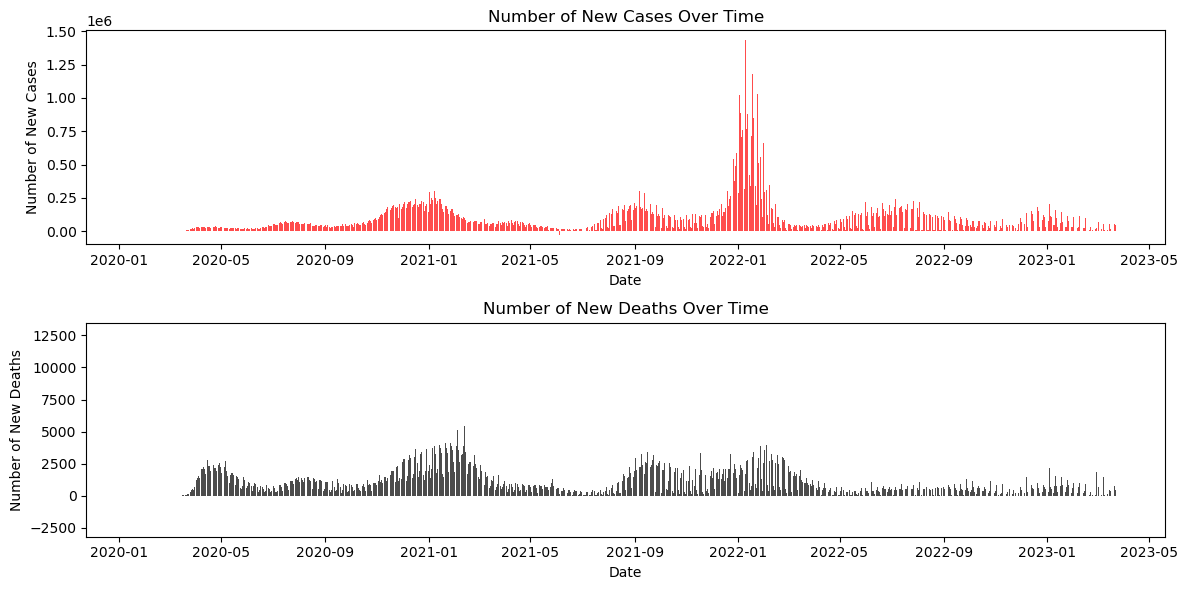

In [6]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Calculate daily increments for cases and deaths
df['new_cases'] = df['cases'].diff().fillna(0)
df['new_deaths'] = df['deaths'].diff().fillna(0)

# Plotting
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Number of new cases over time
plt.subplot(2, 1, 1)
plt.bar(df['date'], df['new_cases'], color='r', alpha=0.7)
plt.title('Number of New Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of New Cases')

# Number of new deaths over time
plt.subplot(2, 1, 2)
plt.bar(df['date'], df['new_deaths'], color='black', alpha=0.7)
plt.title('Number of New Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Number of New Deaths')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

### survery at 17 JUL 2020
https://www.nytimes.com/interactive/2020/07/17/upshot/coronavirus-face-mask-map.html

Mask-Wearing Survey Data
The New York Times is releasing estimates of mask usage by county in the United States.

This data comes from a large number of interviews conducted online by the global data and survey firm Dynata at the request of The New York Times. The firm asked a question about mask use to obtain 250,000 survey responses between July 2 and July 14, enough data to provide estimates more detailed than the state level. (Several states have imposed new mask requirements since the completion of these interviews.)

Specifically, each participant was asked: How often do you wear a mask in public when you expect to be within six feet of another person?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


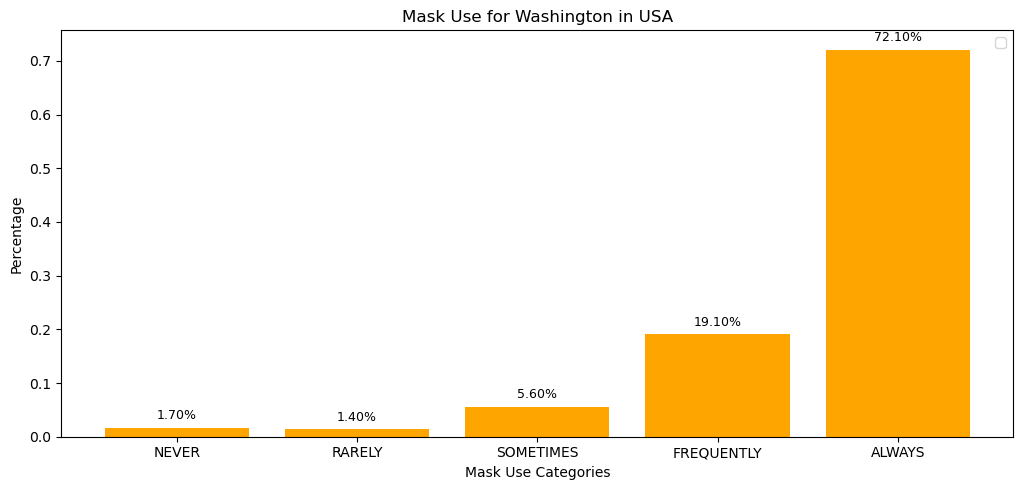

In [7]:
# Plotting for COUNTYFP 1001
plt.figure(figsize=(20, 5))  # Adjust the width of the plot

plt.subplot(1, 2, 1)
county_53061 = df3[df3['COUNTYFP'] == 53061]
bars = plt.bar(county_53061.columns[1:], county_53061.iloc[0, 1:], color='orange')

# Add annotations on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2%}', ha='center', va='bottom', fontsize=9, color='black')

# Add a red horizontal line representing the average
average_percentage = county_53061.iloc[0, 1:].astype(float).mean()


plt.title('Mask Use for Washington in USA')
plt.xlabel('Mask Use Categories')
plt.ylabel('Percentage')

# Display a legend
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\Home\AppData\Local\Temp\ipykernel_1140\3711897738.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_fips_53061_filtered['new_cases'] = df2_fips_53061_filtered['cases'].diff().fillna(0)
C:\Users\Home\AppData\Local\Temp\ipykernel_1140\3711897738.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_fips_53061_filtered['new_cases'] = df2_fips_53061_filtered['new_cases'].apply(lambda x: max(0, x))  # Set negative values to zero
C:\Users\Home\AppData\Local\Temp\ipykernel_1140\3711897738.py:18:

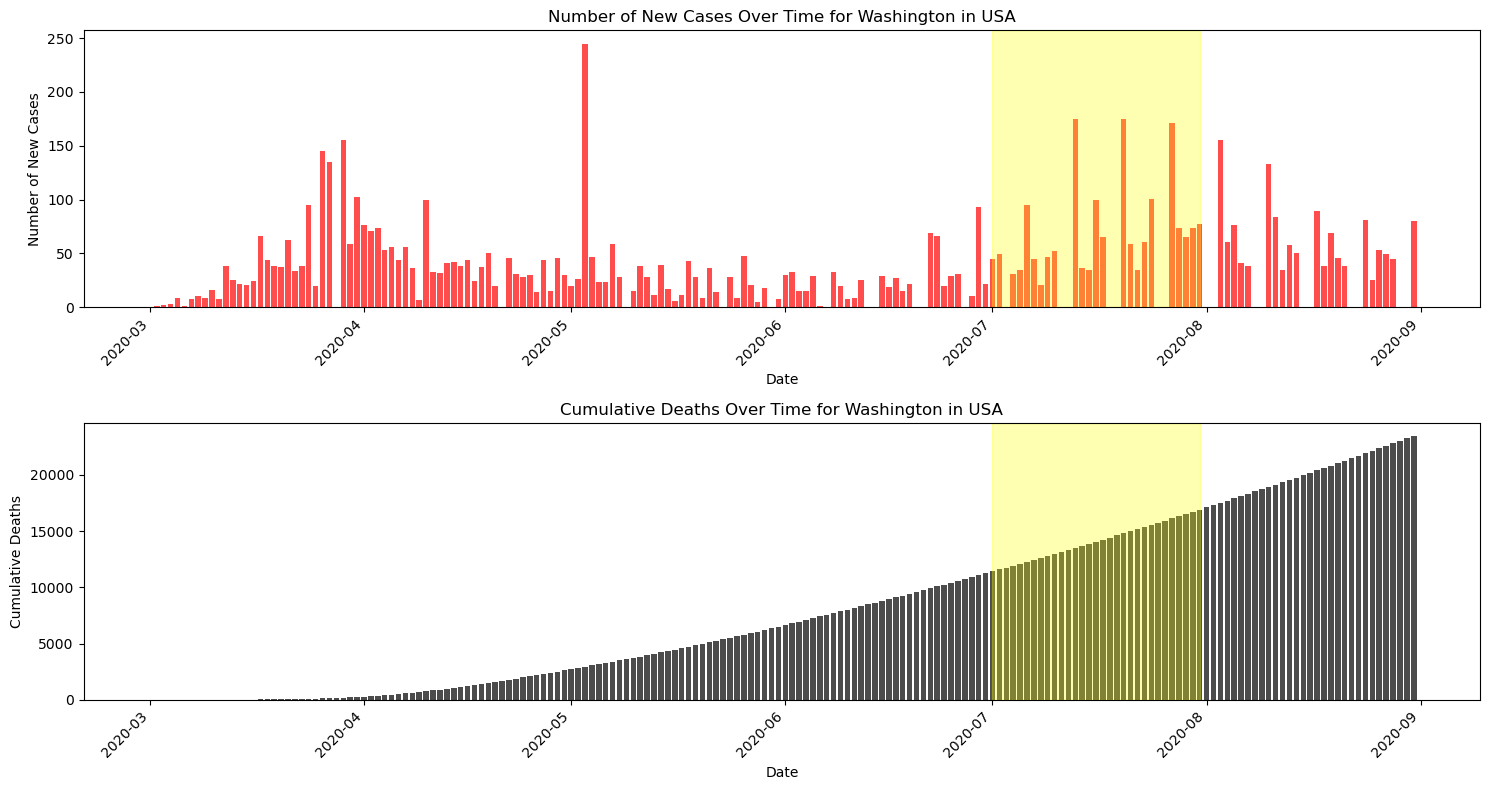

In [11]:
# Assuming your DataFrame is already loaded, or load it using pd.read_csv() or other appropriate method
# df2 = pd.read_csv('your_dataset.csv')

# Convert the 'date' column to datetime format
df2['date'] = pd.to_datetime(df2['date'])

# Filter data for FIPS 53061 (Washington)
df2_fips_53061 = df2[df2['fips'] == 53061]

# Filter data from March 2020 to end of August 2020
start_date = pd.Timestamp('2020-03-01')
end_date = pd.Timestamp('2020-08-31')
df2_fips_53061_filtered = df2_fips_53061[(df2_fips_53061['date'] >= start_date) & (df2_fips_53061['date'] <= end_date)]

# Calculate daily increments for cases and cumulative deaths
df2_fips_53061_filtered['new_cases'] = df2_fips_53061_filtered['cases'].diff().fillna(0)
df2_fips_53061_filtered['new_cases'] = df2_fips_53061_filtered['new_cases'].apply(lambda x: max(0, x))  # Set negative values to zero
df2_fips_53061_filtered['cumulative_deaths'] = df2_fips_53061_filtered['deaths'].cumsum()

# Plotting
plt.figure(figsize=(15, 8))

# Number of new cases over time
plt.subplot(2, 1, 1)
plt.bar(df2_fips_53061_filtered['date'], df2_fips_53061_filtered['new_cases'], color='red', alpha=0.7)
plt.title('Number of New Cases Over Time for Washington in USA')
plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.gca().xaxis.set_major_locator(MonthLocator())  # Show month names on x-axis

# Highlight July in the background
plt.axvspan(pd.Timestamp('2020-07-01'), pd.Timestamp('2020-07-31'), color='yellow', alpha=0.3)

# Cumulative deaths over time
plt.subplot(2, 1, 2)
plt.bar(df2_fips_53061_filtered['date'], df2_fips_53061_filtered['cumulative_deaths'], color='black', alpha=0.7)
plt.title('Cumulative Deaths Over Time for Washington in USA')
plt.xlabel('Date')
plt.ylabel('Cumulative Deaths')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.gca().xaxis.set_major_locator(MonthLocator())  # Show month names on x-axis

# Highlight July in the background
plt.axvspan(pd.Timestamp('2020-07-01'), pd.Timestamp('2020-07-31'), color='yellow', alpha=0.3)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


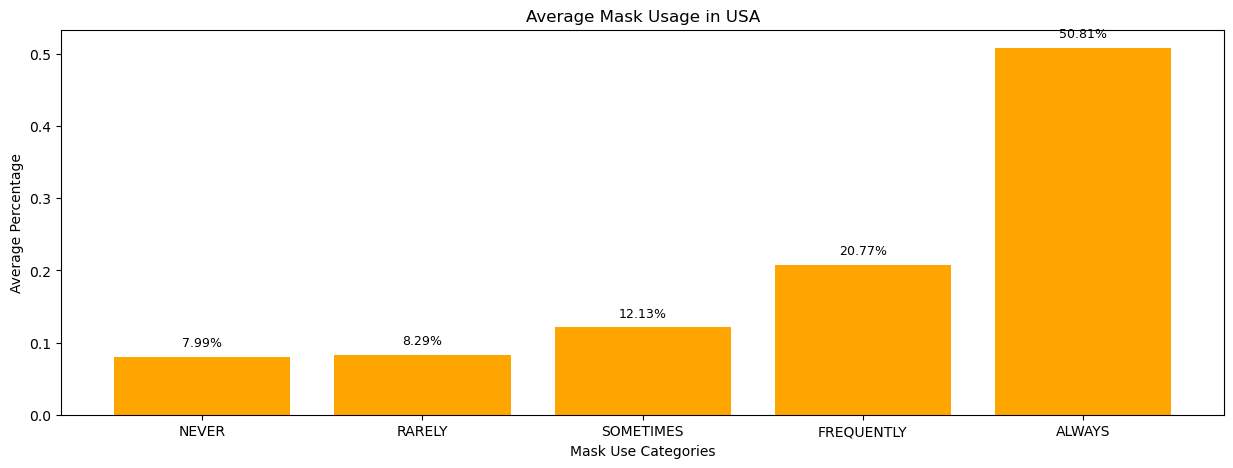

In [12]:
# Calculate the average for each response category across all counties
average_mask_usage = df3.iloc[:, 1:].mean()

# Plotting
plt.figure(figsize=(15, 5))
bars = plt.bar(average_mask_usage.index, average_mask_usage, color='orange')
plt.title('Average Mask Usage in USA')
plt.xlabel('Mask Use Categories')
plt.ylabel('Average Percentage')

# Add annotations on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2%}', ha='center', va='bottom', fontsize=9, color='black')

plt.show()

C:\Users\Home\AppData\Local\Temp\ipykernel_1140\1681581447.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['new_cases'] = df_2020['cases'].diff().fillna(0)
C:\Users\Home\AppData\Local\Temp\ipykernel_1140\1681581447.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['cumulative_deaths'] = df_2020['deaths'].cumsum()


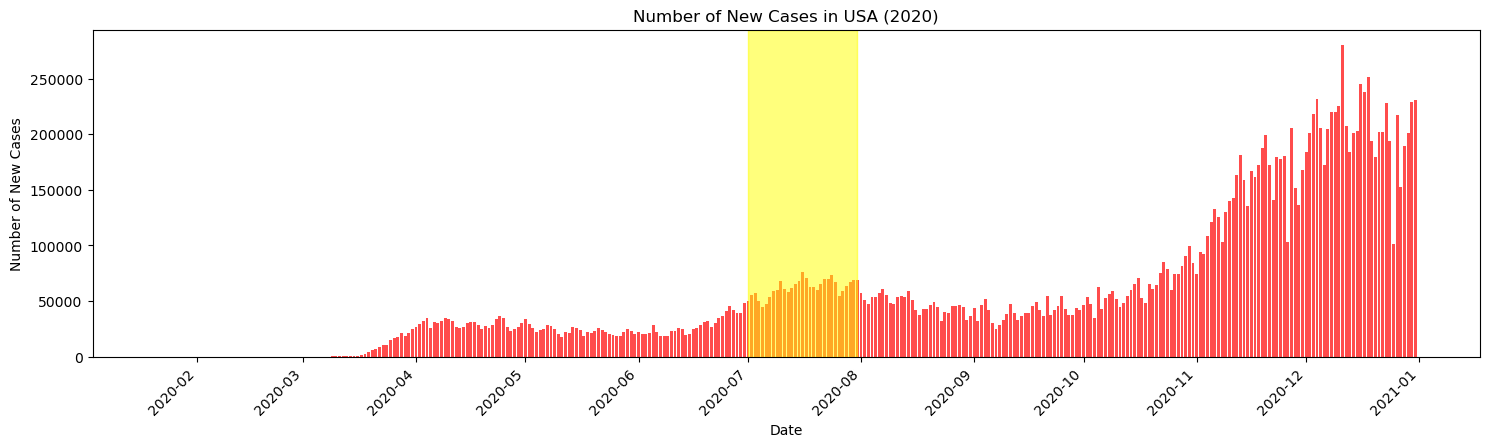

In [13]:
# Assuming your DataFrame is already loaded, or load it using pd.read_csv() or other appropriate method
# df = pd.read_csv('your_dataset.csv')

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter data for the year 2020
df_2020 = df[(df['date'] >= '2020-01-01') & (df['date'] <= '2020-12-31')]

# Calculate daily increments for cases and cumulative deaths
df_2020['new_cases'] = df_2020['cases'].diff().fillna(0)
df_2020['cumulative_deaths'] = df_2020['deaths'].cumsum()

# Plotting
plt.figure(figsize=(15, 8))

# Number of new cases over time in 2020
plt.subplot(2, 1, 1)
plt.bar(df_2020['date'], df_2020['new_cases'], color='red', alpha=0.7)
plt.title('Number of New Cases in USA (2020)')
plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.gca().xaxis.set_major_locator(MonthLocator())  # Show month names on x-axis

# Highlight July in the background
plt.axvspan(pd.Timestamp('2020-07-01'), pd.Timestamp('2020-07-31'), color='yellow', alpha=0.3)

# # Cumulative deaths over time in 2020
# plt.subplot(2, 1, 2)
# plt.bar(df_2020['date'], df_2020['cumulative_deaths'], color='black', alpha=0.7)
# plt.title('Cumulative Deaths in USA (2020)')
# plt.xlabel('Date')
# plt.ylabel('Cumulative Deaths')
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
# plt.gca().xaxis.set_major_locator(MonthLocator())  # Show month names on x-axis

# Highlight July in the background
plt.axvspan(pd.Timestamp('2020-07-01'), pd.Timestamp('2020-07-31'), color='yellow', alpha=0.3)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


### example 2

# Assessing the risks of ‘infodemics’ in response to COVID-19 epidemics

# reference
https://www.nature.com/articles/s41562-020-00994-6

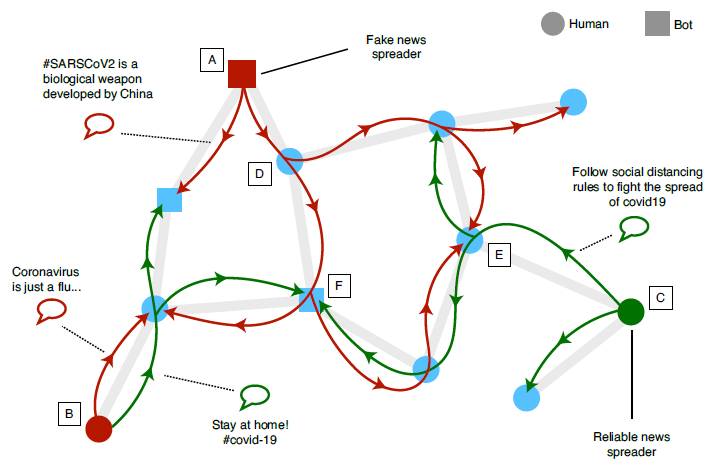

In [14]:
from IPython.display import Image

# Specify the path to your image file
image_path = '4.png'  # Replace with the actual path to your image file

# Display the image
Image(filename=image_path)


Our findings unveiled discernible waves of potentially unreliable information preceding the surge in COVID-19 infections. These waves exposed entire nations to falsehoods, posing a significant threat to public health. However, as infections began to rise, a shift occurred—reliable information gained prominence, and Twitter content transitioned toward more credible sources of information. This shift highlights the adaptability and responsiveness of information dissemination during critical periods.

### example - 3

# reference
https://www.sciencedirect.com/science/article/pii/S2352340920314608?via%3Dihub

### I am most afraid of COVID-19 ?
Strongly disagree = 1
Disagree = 2
Neutral = 3
Agree =4
Strongly agree = 5

### I regularly wash my hands for 20 seconds:
Never = 1
Rarely = 2
Sometimes = 3
Often = 4
Always = 5 

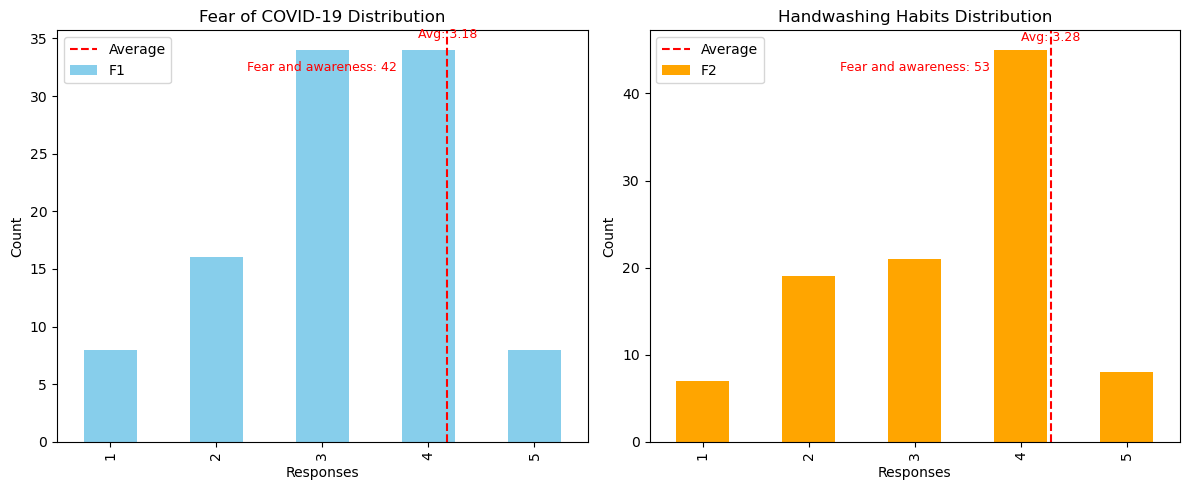

In [3]:
# Specify the file path if the Excel file is not in the same directory as your Jupyter Notebook
# For example: file_path = 'path/to/your/excel/file.xlsx'

# If the Excel file is in the same directory, you can just provide the file name
file_name = 'KPK data set.xlsx'

# Combine the directory path and file name if needed
# If the file is in the same directory, you can skip this step
# full_file_path = file_path + '/' + file_name

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(file_name)

# Display the DataFrame to verify that the data has been loaded
#df.head()



# Assuming you already have your DataFrame loaded (df)

# Filter the data where 'CI' column is 0 (Yes, I know = 0)
knows_someone_infected = df[df['CI'] == 0]

# Analyze the fear of COVID-19 in this subset
fear_of_covid_count = knows_someone_infected['F1'].value_counts()

# Analyze the handwashing habits in this subset
handwashing_count = knows_someone_infected['F2'].value_counts()

# Calculate the average fear of COVID-19 and handwashing habits in this subset
avg_fear_of_covid = knows_someone_infected['F1'].mean()
avg_handwashing = knows_someone_infected['F2'].mean()

# Count of people with responses greater than 4
count_greater_than_4_fear = knows_someone_infected[knows_someone_infected['F1'] >= 4].shape[0]
count_greater_than_4_handwashing = knows_someone_infected[knows_someone_infected['F2'] >= 4].shape[0]

# Plotting Fear of COVID-19 distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
fear_of_covid_count.sort_index().plot(kind='bar', color='skyblue')
plt.axvline(x=avg_fear_of_covid, color='red', linestyle='--', label='Average')
plt.text(avg_fear_of_covid, max(fear_of_covid_count) + 1, f'Avg: {avg_fear_of_covid:.2f}', color='red', ha='center', fontsize=9)
plt.annotate(f'Fear and awareness: {count_greater_than_4_fear}', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', fontsize=9, color='red')
plt.title('Fear of COVID-19 Distribution')
plt.xlabel('Responses')
plt.ylabel('Count')
plt.legend(loc='upper left')

# Plotting Handwashing habits distribution
plt.subplot(1, 2, 2)
handwashing_count.sort_index().plot(kind='bar', color='orange')
plt.axvline(x=avg_handwashing, color='red', linestyle='--', label='Average')
plt.text(avg_handwashing, max(handwashing_count) + 1, f'Avg: {avg_handwashing:.2f}', color='red', ha='center', fontsize=9)
plt.annotate(f'Fear and awareness: {count_greater_than_4_handwashing}', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', fontsize=9, color='red')
plt.title('Handwashing Habits Distribution')
plt.xlabel('Responses')
plt.ylabel('Count')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


# Model 1 ) Local, prevalence-based spread of the fear of the disease 

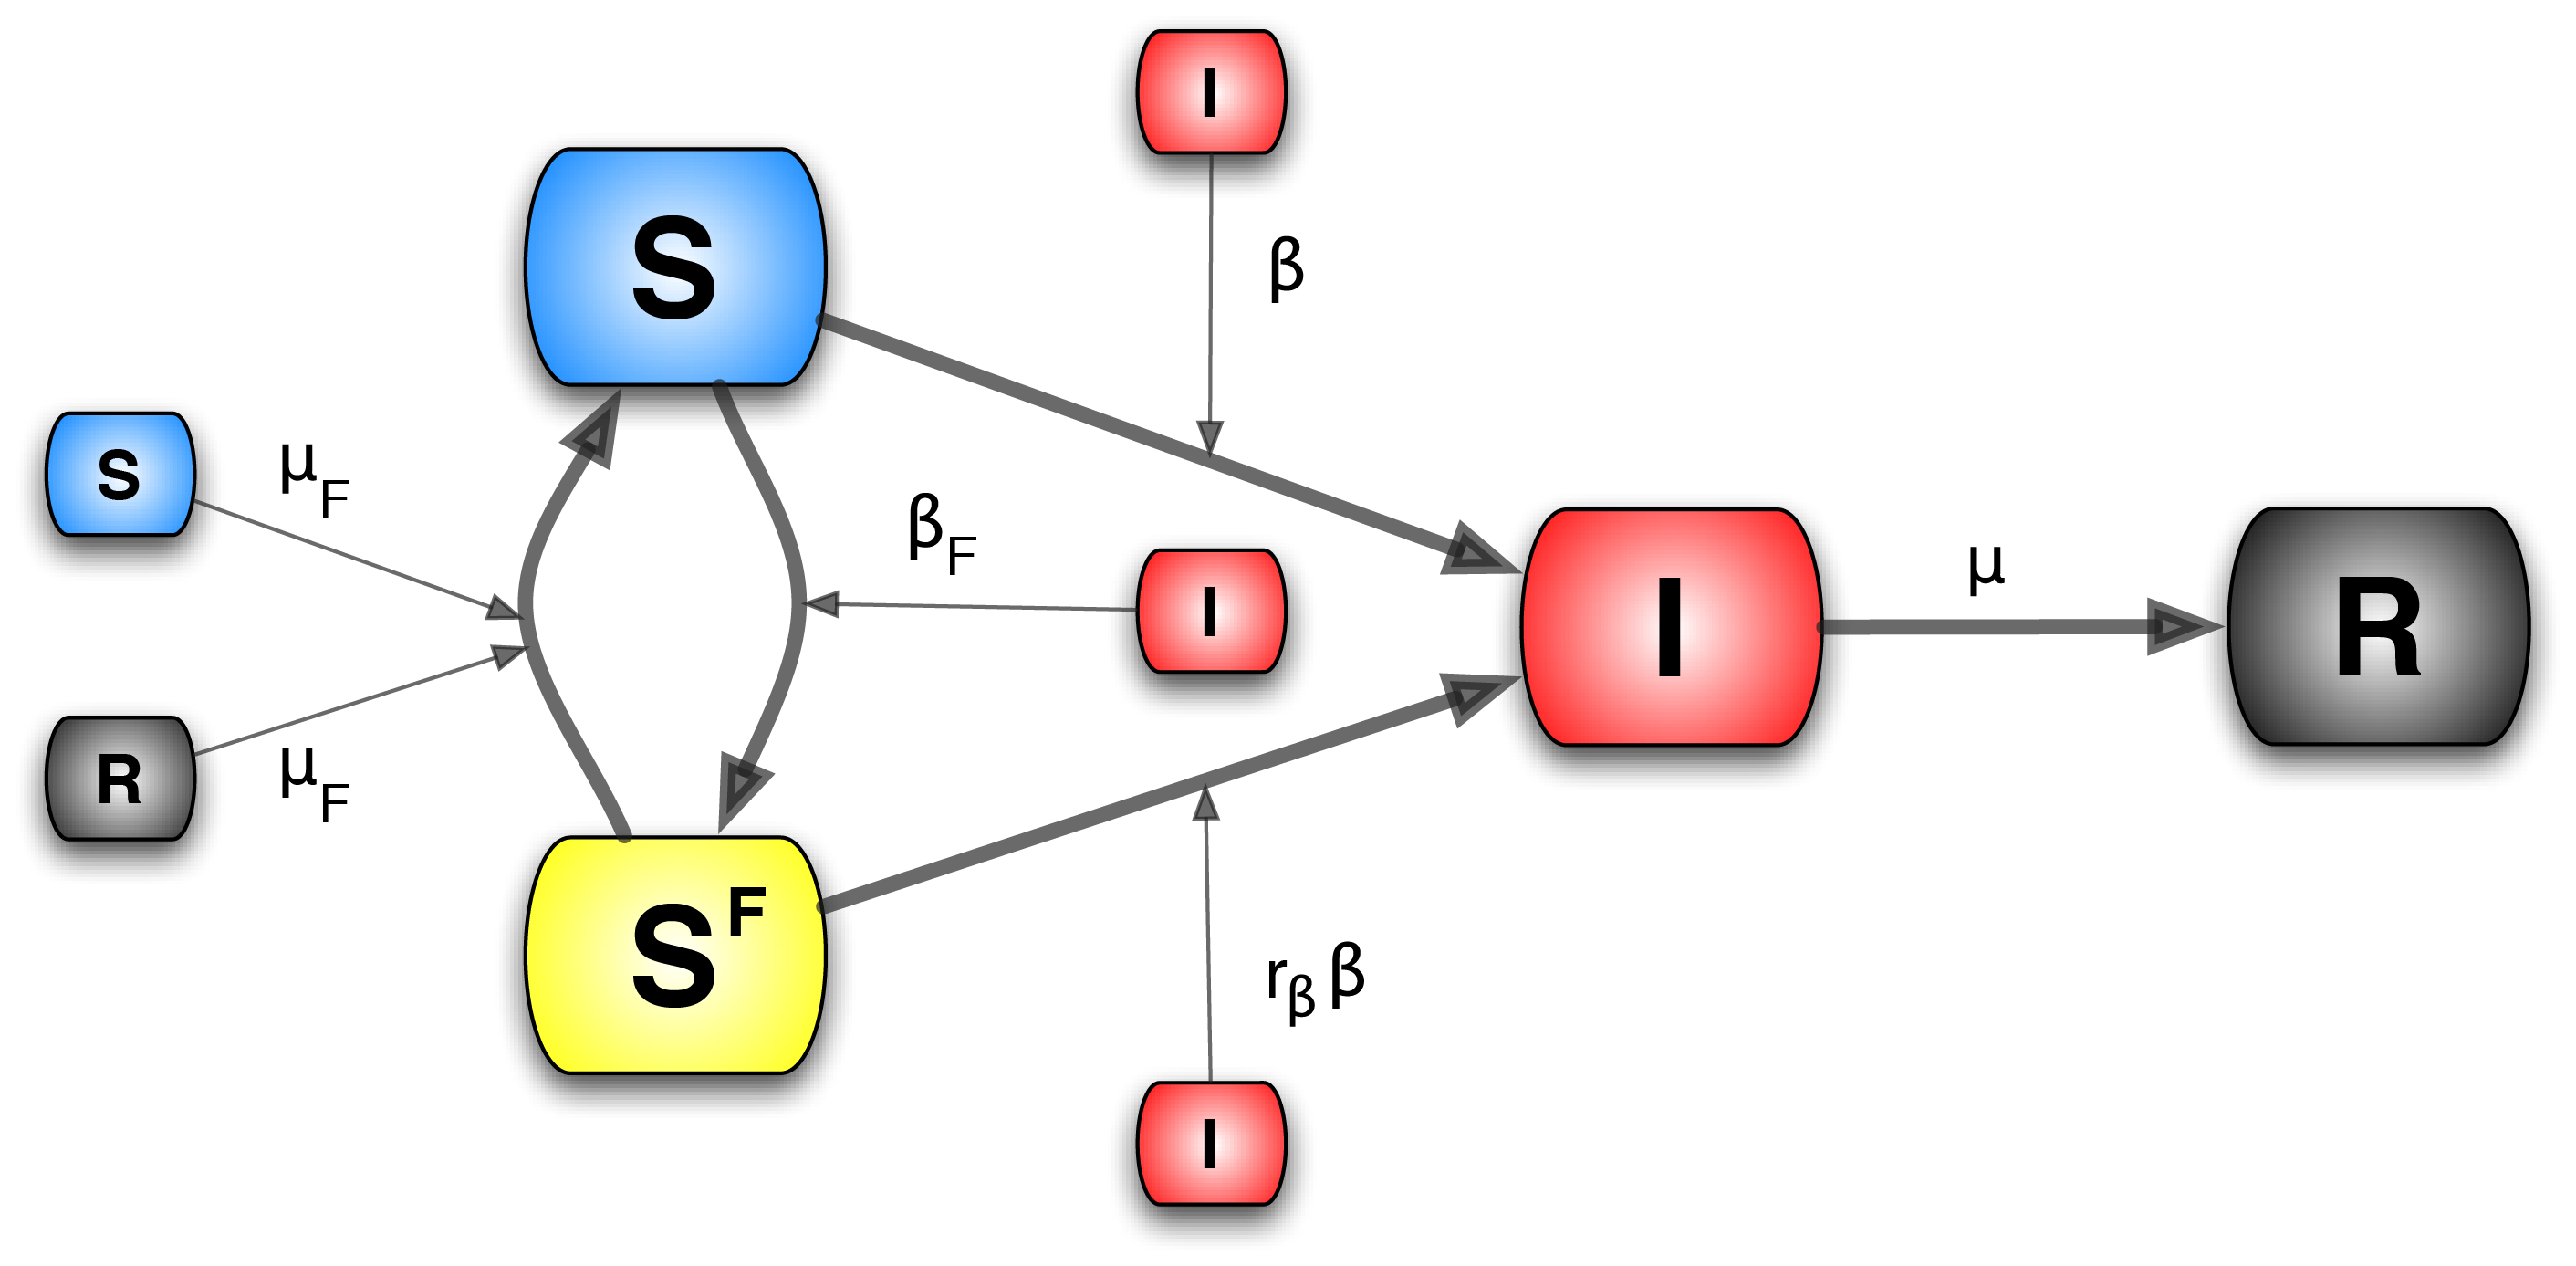

In [4]:
from IPython.display import Image

# Specify the path to your image file
image_path = '1.png'  # Replace with the actual path to your image file

# Display the image
Image(filename=image_path)


In [2]:
N = int(1e6)
N_sims = 5
t_max = 800
I0 = 1

b    = 0.2
mu   = 0.1
r_b  = 0.05
b_f  = 0.7
mu_f = 0.015

frac = 0.001 # only keep runs where the disease reaches more than this fraction of the population

init = {"S"   : N-I0,
        "S_f" : 0,
        "I"   : I0,
        "R"   : 0,
       }

step = 10 # for making x-axis less clobbered in plots
fontsize = 16

rng = default_rng()

In [3]:
def simulate(init, t_max):

    compartments = {"S"  : init["S"],
                    "S_f": init["S_f"],
                    "I"  : init["I"],
                    "R"  : init["R"],
                   }
    
    time_series = {"S"  : [init["S"]],
                   "S_f": [init["S_f"]],
                   "I"  : [init["I"]],
                   "R"  : [init["R"]],
                   }

    for t in range(0, t_max):
        S, S_f, I, R = list(compartments.values())


        # Disease Transmission for S compartment #
        # S + I -(b)-> I + I
        dSII = rng.binomial(S, b*I/N)
        
        # Disease Transmission for S_f compartment #
        # S_f + I -(r_b*b)-> I + I
        dS_fII = rng.binomial(S_f, r_b*b*I/N)

        # Fear Transmission #
        # S + I -(b_f)-> S_f + I
        dSIS_f = rng.binomial(S, b_f*I/N)

        # Overcoming the fear after contact with R #
        # S_f + R -(mu_f)-> S + R
        dS_fRS = rng.binomial(S_f, mu_f*R/N)
        

        # Overcoming the fear after contact with S #
        # S_f + S -(mu_f)-> S + S
        dS_fSS = rng.binomial(S_f, mu_f*S/N)

        ##### TRANSITION PROCESSES #####

        # Healing #
        # I -(mu)-> R
        dIR = rng.binomial(I, mu)

     
        compartments["S"]   += -dSII         -dSIS_f +dS_fRS +dS_fSS     #
     
        compartments["S_f"] +=       -dS_fII +dSIS_f -dS_fRS -dS_fSS     #

        compartments["I"]   += +dSII +dS_fII                         -dIR#

        compartments["R"]   +=                                       +dIR#
        #                     #     #       #       #       #       #    #


        for key in compartments:
            compartments[key] = np.clip(compartments[key], 0, N)
            time_series[key].append(compartments[key])
        
        tt = np.linspace(0, t_max, t_max+1)
        
    return tt, time_series



In [4]:
s_matrix   = np.zeros((N_sims, t_max+1))
s_f_matrix = np.zeros((N_sims, t_max+1))
i_matrix   = np.zeros((N_sims, t_max+1))
r_matrix   = np.zeros((N_sims, t_max+1))

for i, (row_s, row_s_f, row_i, row_r) in enumerate(zip(s_matrix, s_f_matrix, i_matrix, r_matrix)):
    print("{}/{}".format(i+1, len(i_matrix)), end='\r')
    tt, result = simulate(init, t_max)
    
    if(result["R"][-1] >= frac * N): # Only keep runs where the desease reaches a significant fraction of the pupulation
        row_s[:]   = [elem*100/N for elem in result["S"]]
        row_s_f[:] = [elem*100/N for elem in result["S_f"]]
        row_i[:]   = [elem*100/N for elem in result["I"]]
        row_r[:]   = [elem*100/N for elem in result["R"]]

# remove rows that only contain 0
# those coorespond to runs below the threshold
s_matrix = s_matrix[~np.all(s_matrix == 0, axis=1)]
s_f_matrix = s_f_matrix[~np.all(s_f_matrix == 0, axis=1)]
i_matrix = i_matrix[~np.all(i_matrix == 0, axis=1)]
r_matrix = r_matrix[~np.all(r_matrix == 0, axis=1)]

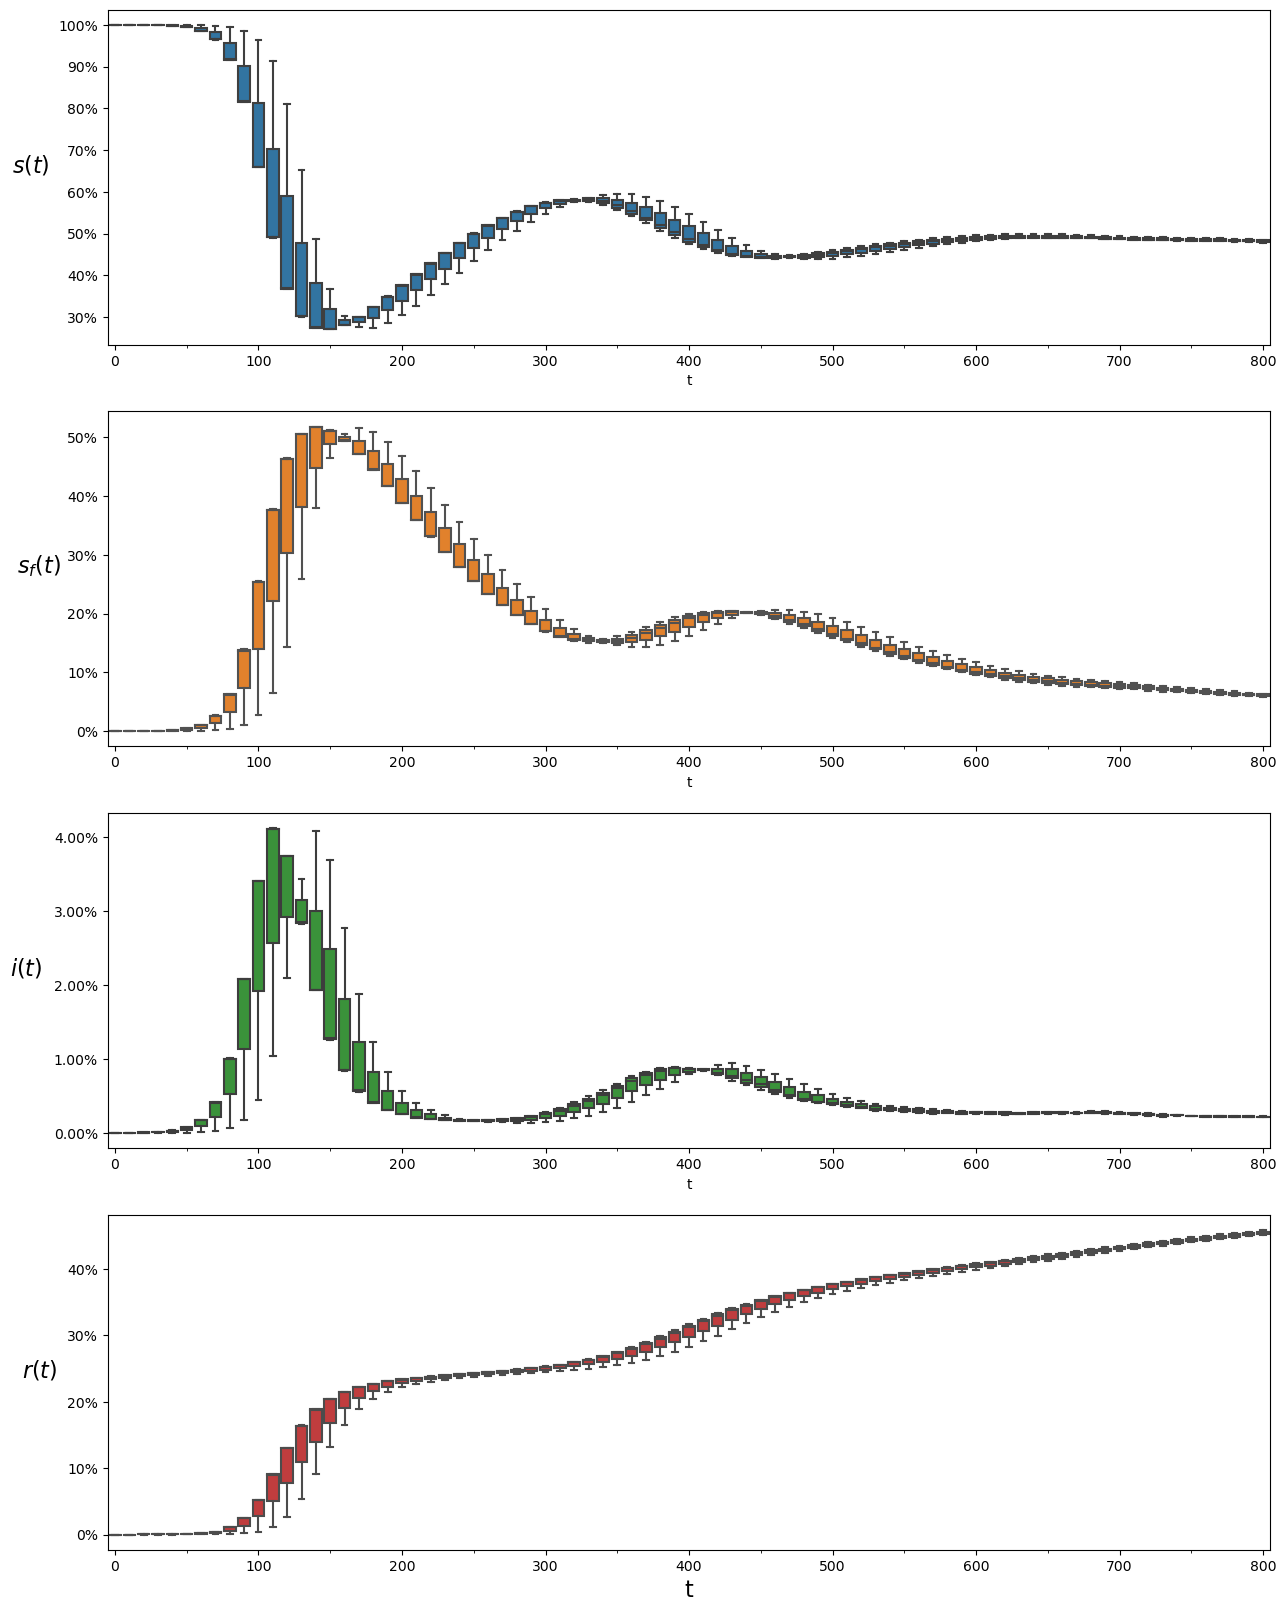

In [18]:
# Visualization

tt = np.linspace(0, t_max, t_max+1)
tt_step = np.array([int(t) for t in tt[::step]])

df_dict = {'t':[],
           's':   [],
           's_f': [],
           'i':   [],
           'r':   [],}

for t in tt_step:
    for (row_s, row_s_f, row_i, row_r) in zip(s_matrix, s_f_matrix, i_matrix, r_matrix):
        df_dict['t'].append(t)
        df_dict['s'].append(row_s[t])
        df_dict['s_f'].append(row_s_f[t])
        df_dict['i'].append(row_i[t])
        df_dict['r'].append(row_r[t])


df = pd.DataFrame(df_dict)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15, 20))

ax4.set_xlabel('$time[days]$', fontsize = fontsize)

boxplot = sns.boxplot(x='t', y='s',   data=df, color="C0", ax=ax1, showfliers = False)
boxplot = sns.boxplot(x='t', y='s_f', data=df, color="C1", ax=ax2, showfliers = False)
boxplot = sns.boxplot(x='t', y='i',   data=df, color="C2", ax=ax3, showfliers = False)
boxplot = sns.boxplot(x='t', y='r',   data=df, color="C3", ax=ax4, showfliers = False)

for ax in (ax1, ax2, ax3, ax4):
    ax.yaxis.set_major_formatter(mtick.PercentFormatter()) #display "%" sign on y axis
    
    ax.xaxis.set_major_locator(mtick.MultipleLocator(10))
    ax.xaxis.set_minor_locator(mtick.MultipleLocator(5))
    
ax1.set_ylabel('$s(t)$', fontsize = fontsize, labelpad = 20).set_rotation(0)
ax2.set_ylabel('$s_f(t)$', fontsize = fontsize, labelpad = 20).set_rotation(0)
ax3.set_ylabel('$i(t)$', fontsize = fontsize, labelpad = 20).set_rotation(0)
ax4.set_ylabel('$r(t)$', fontsize = fontsize, labelpad = 20).set_rotation(0)

plt.show()

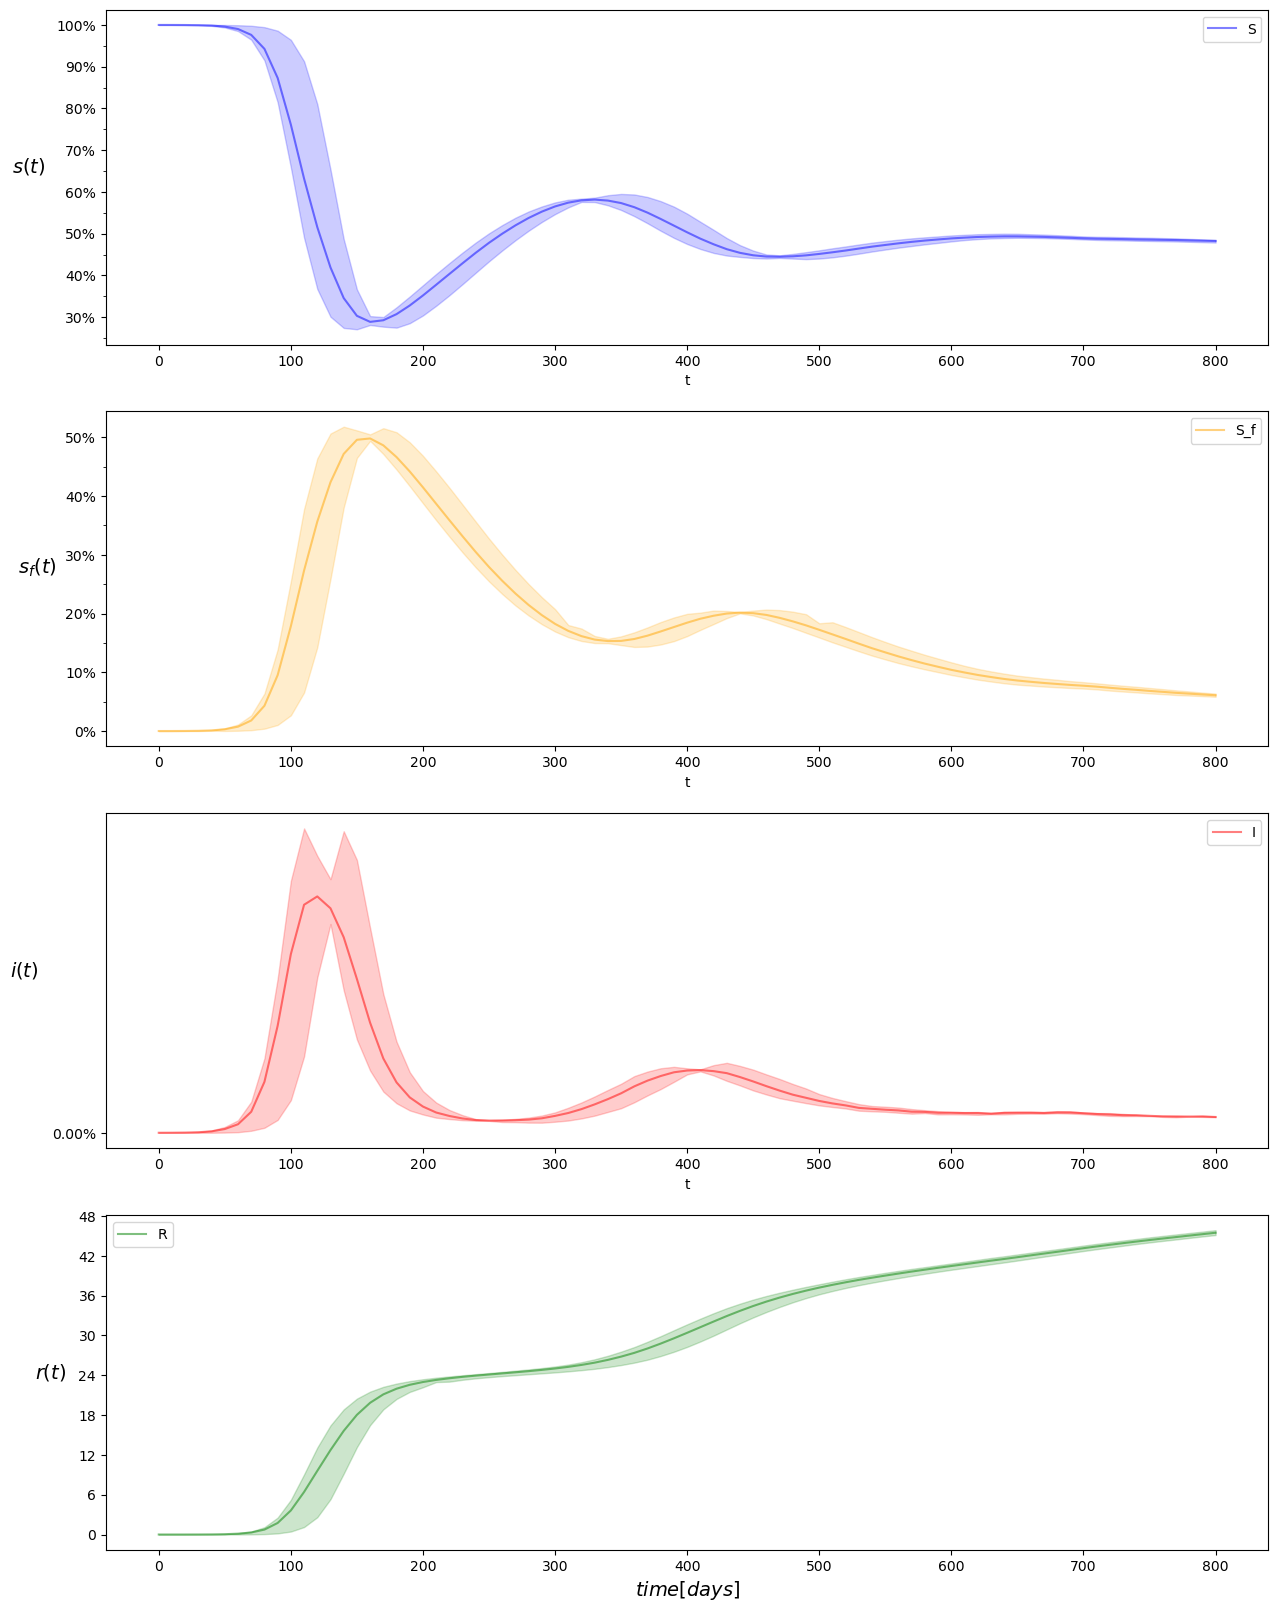

In [19]:
def visualize_results(s_matrix, s_f_matrix, i_matrix, r_matrix, t_max, step):
    tt = np.linspace(0, t_max, t_max + 1)
    tt_step = np.array([int(t) for t in tt[::step]])

    df_dict = {'t': [], 's': [], 's_f': [], 'i': [], 'r': []}

    for t in tt_step:
        for (row_s, row_s_f, row_i, row_r) in zip(s_matrix, s_f_matrix, i_matrix, r_matrix):
            df_dict['t'].append(t)
            df_dict['s'].append(row_s[t])
            df_dict['s_f'].append(row_s_f[t])
            df_dict['i'].append(row_i[t])
            df_dict['r'].append(row_r[t])

    df = pd.DataFrame(df_dict)

    fig, axes = plt.subplots(4, 1, figsize=(15, 20))

    # Plotting lines for each simulation with specified colors
    sns.lineplot(x='t', y='s', data=df, ax=axes[0], alpha=0.5, label='S', color='blue')
    sns.lineplot(x='t', y='s_f', data=df, ax=axes[1], alpha=0.5, label='S_f', color='orange')
    sns.lineplot(x='t', y='i', data=df, ax=axes[2], alpha=0.5, label='I', color='red')
    sns.lineplot(x='t', y='r', data=df, ax=axes[3], alpha=0.5, label='R', color='green')

    # Adding highlights for specific conditions
    highlight_condition = (df['r'] >= frac * N)  # Highlight when R crosses a fraction of the population
    for ax in axes:
        ax.fill_between(df['t'], 0, ax.get_ylim()[1], where=highlight_condition, color='red', alpha=0.3)

        ax.xaxis.set_major_locator(mtick.MultipleLocator(100))  # Set the major locator to 100 days
        ax.legend()

    # Customize y-axis ticks
    for ax in axes[:-1]:
        ax.yaxis.set_major_locator(mtick.MultipleLocator(10))
        ax.yaxis.set_minor_locator(mtick.MultipleLocator(5))
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())

    axes[3].yaxis.set_major_locator(mtick.MaxNLocator(integer=True))
    axes[3].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

    axes[0].set_ylabel('$s(t)$', fontsize=14, labelpad=20).set_rotation(0)
    axes[1].set_ylabel('$s_f(t)$', fontsize=14, labelpad=20).set_rotation(0)
    axes[2].set_ylabel('$i(t)$', fontsize=14, labelpad=20).set_rotation(0)
    axes[3].set_ylabel('$r(t)$', fontsize=14, labelpad=20).set_rotation(0)

    plt.xlabel('$time [days]$', fontsize=14)
    plt.show()

# Example usage:
# Assuming you have already defined s_matrix, s_f_matrix, i_matrix, r_matrix, t_max, and step
visualize_results(s_matrix, s_f_matrix, i_matrix, r_matrix, t_max, step)


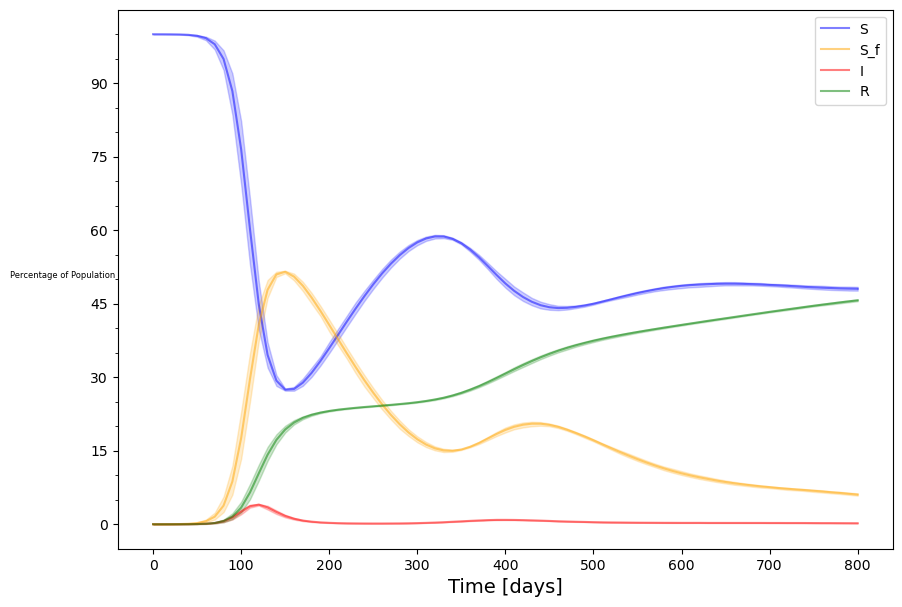

In [6]:
def visualize_results(s_matrix, s_f_matrix, i_matrix, r_matrix, t_max, step):
    tt = np.linspace(0, t_max, t_max + 1)
    tt_step = np.array([int(t) for t in tt[::step]])

    df_dict = {'t': [], 's': [], 's_f': [], 'i': [], 'r': []}

    for t in tt_step:
        for (row_s, row_s_f, row_i, row_r) in zip(s_matrix, s_f_matrix, i_matrix, r_matrix):
            df_dict['t'].append(t)
            df_dict['s'].append(row_s[t])
            df_dict['s_f'].append(row_s_f[t])
            df_dict['i'].append(row_i[t])
            df_dict['r'].append(row_r[t])

    df = pd.DataFrame(df_dict)

    fig, ax = plt.subplots(figsize=(10, 7))  # Use a single set of axes

    # Plotting lines for each simulation with specified colors
    sns.lineplot(x='t', y='s', data=df, ax=ax, alpha=0.5, label='S', color='blue')
    sns.lineplot(x='t', y='s_f', data=df, ax=ax, alpha=0.5, label='S_f', color='orange')
    sns.lineplot(x='t', y='i', data=df, ax=ax, alpha=0.5, label='I', color='red')
    sns.lineplot(x='t', y='r', data=df, ax=ax, alpha=0.5, label='R', color='green')

    # Adding highlights for specific conditions
    highlight_condition = (df['r'] >= frac * N)  # Highlight when R crosses a fraction of the population
    ax.fill_between(df['t'], 0, ax.get_ylim()[1], where=highlight_condition, color='red', alpha=0.3)

    ax.xaxis.set_major_locator(mtick.MultipleLocator(100))  # Set the major locator to 100 days
    ax.legend()

    # Customize y-axis ticks
    ax.yaxis.set_major_locator(mtick.MultipleLocator(10))
    ax.yaxis.set_minor_locator(mtick.MultipleLocator(5))
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

    ax.yaxis.set_major_locator(mtick.MaxNLocator(integer=True))
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

    ax.set_ylabel('Percentage of Population', fontsize=6, labelpad=20).set_rotation(0)
    plt.xlabel('Time [days]', fontsize=14)
    plt.show()

# Example usage:
# Assuming you have already defined s_matrix, s_f_matrix, i_matrix, r_matrix, t_max, and step
visualize_results(s_matrix, s_f_matrix, i_matrix, r_matrix, t_max, step)


# The role of  $\beta_{\text{f}} $
 $\beta_{\text{f}} $is the transmission rate of the awareness/fear of the disease. This process defines a transition rate for thefear of the disease that can be expressed by the usual mass-action law ~  $\beta_{\text{f}} I(t) / N $
 
 As we expected with increasing the $\beta_{\text{f}} $ the population of the infection people will be decreased.

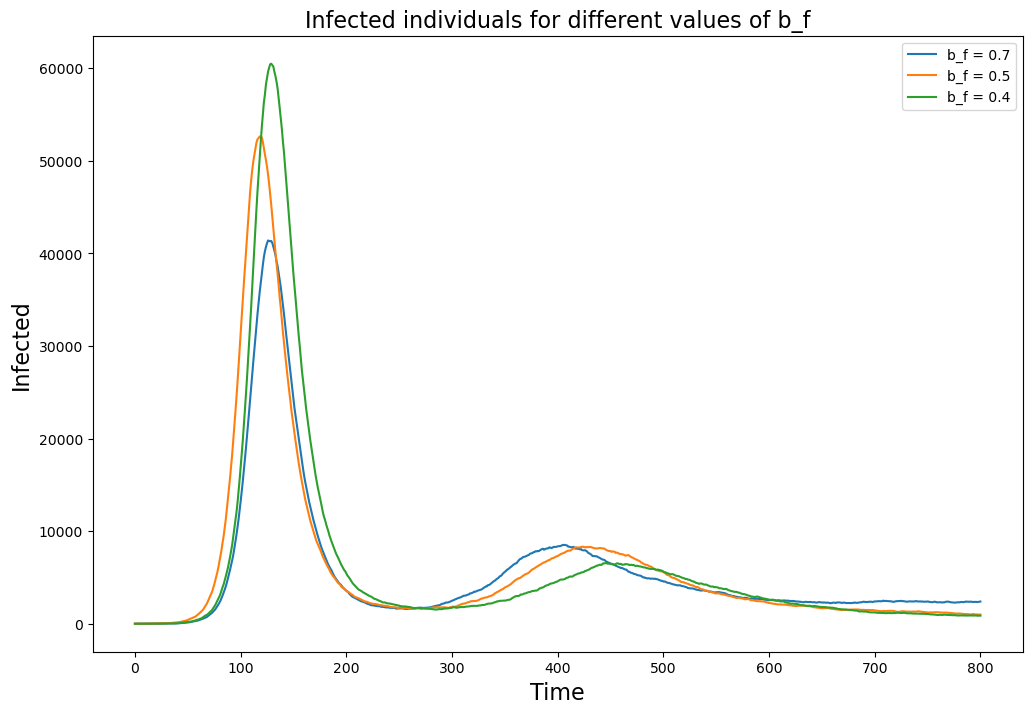

In [11]:
import matplotlib.pyplot as plt
N = int(1e6)
N_sims = 5
t_max = 800
I0 = 1

b    = 0.2
mu   = 0.1
r_b  = 0.05
mu_f = 0.015

frac = 0.001 # only keep runs where the disease reaches more than this fraction of the population

init = {"S": N - I0,
        "S_f": 0,
        "I": I0,
        "R": 0,
        }

step = 10  # for making x-axis less clobbered in plots
fontsize = 16

rng = default_rng()


def simulate(init, t_max, b_f):
    compartments = {"S": init["S"],
                    "S_f": init["S_f"],
                    "I": init["I"],
                    "R": init["R"],
                    }

    time_series = {"S": [init["S"]],
                   "S_f": [init["S_f"]],
                   "I": [init["I"]],
                   "R": [init["R"]],
                   }

    for t in range(0, t_max):
        S, S_f, I, R = list(compartments.values())

        ##### TRANSMISSION PROCESSES #####
        # The convention is dABC for a process A + B -> C + B

        # Disease Transmission for S compartment #
        # S + I -(b)-> I + I
        dSII = rng.binomial(S, b*I/N)

        # Disease Transmission for S_f compartment #
        # S_f + I -(r_b*b)-> I + I
        dS_fII = rng.binomial(S_f, r_b*b*I/N)

        # Fear Transmission #
        # S + I -(b_f)-> S_f + I
        dSIS_f = rng.binomial(S, b_f*I/N)

        # Overcoming the fear after contact with R #
        # S_f + R -(mu_f)-> S + R
        dS_fRS = rng.binomial(S_f, mu_f*R/N)
        

        # Overcoming the fear after contact with S #
        # S_f + S -(mu_f)-> S + S
        dS_fSS = rng.binomial(S_f, mu_f*S/N)

        ##### TRANSITION PROCESSES #####

        # Healing #
        # I -(mu)-> R
        dIR = rng.binomial(I, mu)

        ##################################################################
        #                     # dSII# dS_fII# dSIS_f# dS_fRS# dS_fSS# dIR#
        #                     #     #       #       #       #       #    #
        ##################################################################    
        compartments["S"]   += -dSII         -dSIS_f +dS_fRS +dS_fSS     #
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["S_f"] +=       -dS_fII +dSIS_f -dS_fRS -dS_fSS     #
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["I"]   += +dSII +dS_fII                         -dIR#
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["R"]   +=                                       +dIR#
        #                     #     #       #       #       #       #    #
        ##################################################################

        for key in compartments:
            compartments[key] = np.clip(compartments[key], 0, N)
            time_series[key].append(compartments[key])

        tt = np.linspace(0, t_max, t_max + 1)

    return tt, time_series


# Values of r_b to test
b_f_values = [0.7 , 0.5 ,0.4]

# Plotting
plt.figure(figsize=(12, 8))

for b_f in b_f_values :
    _, time_series = simulate(init, t_max, b_f)
    plt.plot(_, time_series["I"], label=f'b_f = {b_f}')

plt.xlabel('Time', fontsize=fontsize)
plt.ylabel('Infected', fontsize=fontsize)
plt.title('Infected individuals for different values of b_f', fontsize=fontsize)
plt.legend()
plt.show()


# The role of  $r_{\text{b}} $ (compatible with next point)

### This parameter represents the influence of fear on disease transmission. It scales the transmission rate when fear is present.

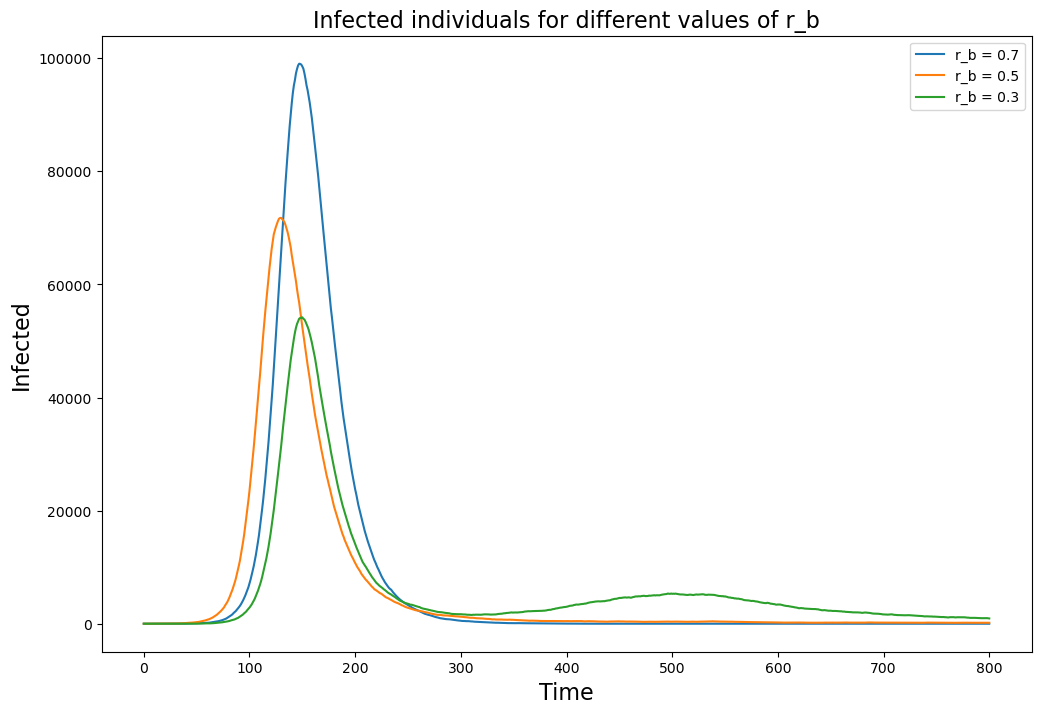

In [35]:
N = int(1e6)
N_sims = 5
t_max = 800
I0 = 1

b    = 0.2
mu   = 0.1
b_f  = 0.7
mu_f = 0.015

frac = 0.001 # only keep runs where the disease reaches more than this fraction of the population

init = {"S": N - I0,
        "S_f": 0,
        "I": I0,
        "R": 0,
        }

step = 10  # for making x-axis less clobbered in plots
fontsize = 16

rng = default_rng()


def simulate(init, t_max, r_b):
    compartments = {"S": init["S"],
                    "S_f": init["S_f"],
                    "I": init["I"],
                    "R": init["R"],
                    }

    time_series = {"S": [init["S"]],
                   "S_f": [init["S_f"]],
                   "I": [init["I"]],
                   "R": [init["R"]],
                   }

    for t in range(0, t_max):
        S, S_f, I, R = list(compartments.values())

        ##### TRANSMISSION PROCESSES #####
        # The convention is dABC for a process A + B -> C + B

        # Disease Transmission for S compartment #
        # S + I -(b)-> I + I
        dSII = rng.binomial(S, b*I/N)

        # Disease Transmission for S_f compartment #
        # S_f + I -(r_b*b)-> I + I
        dS_fII = rng.binomial(S_f, r_b*b*I/N)

        # Fear Transmission #
        # S + I -(b_f)-> S_f + I
        dSIS_f = rng.binomial(S, b_f*I/N)

        # Overcoming the fear after contact with R #
        # S_f + R -(mu_f)-> S + R
        dS_fRS = rng.binomial(S_f, mu_f*R/N)
        

        # Overcoming the fear after contact with S #
        # S_f + S -(mu_f)-> S + S
        dS_fSS = rng.binomial(S_f, mu_f*S/N)

        ##### TRANSITION PROCESSES #####

        # Healing #
        # I -(mu)-> R
        dIR = rng.binomial(I, mu)

        ##################################################################
        #                     # dSII# dS_fII# dSIS_f# dS_fRS# dS_fSS# dIR#
        #                     #     #       #       #       #       #    #
        ##################################################################    
        compartments["S"]   += -dSII         -dSIS_f +dS_fRS +dS_fSS     #
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["S_f"] +=       -dS_fII +dSIS_f -dS_fRS -dS_fSS     #
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["I"]   += +dSII +dS_fII                         -dIR#
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["R"]   +=                                       +dIR#
        #                     #     #       #       #       #       #    #
        ##################################################################

        for key in compartments:
            compartments[key] = np.clip(compartments[key], 0, N)
            time_series[key].append(compartments[key])

        tt = np.linspace(0, t_max, t_max + 1)

    return tt, time_series


# Values of r_b to test
r_b_values = [0.7 , 0.5 ,0.3]

# Plotting
plt.figure(figsize=(12, 8))

for r_b in r_b_values:
    _, time_series = simulate(init, t_max, r_b)
    plt.plot(_, time_series["I"], label=f'r_b = {r_b}')

plt.xlabel('Time', fontsize=fontsize)
plt.ylabel('Infected', fontsize=fontsize)
plt.title('Infected individuals for different values of r_b', fontsize=fontsize)
plt.legend()
plt.show()


# Check the Role of ${\beta}$

Part A) 
The resulting plots provide insights into how different transmission parameters ${\beta}$ impact the evolution of the disease in terms of susceptible individuals, individuals who have overcome fear, infected individuals, and recovered individuals over time.
This code offers a visual representation of the disease dynamics under varying transmission parameters, aiding in the analysis and understanding of the model's behavior.

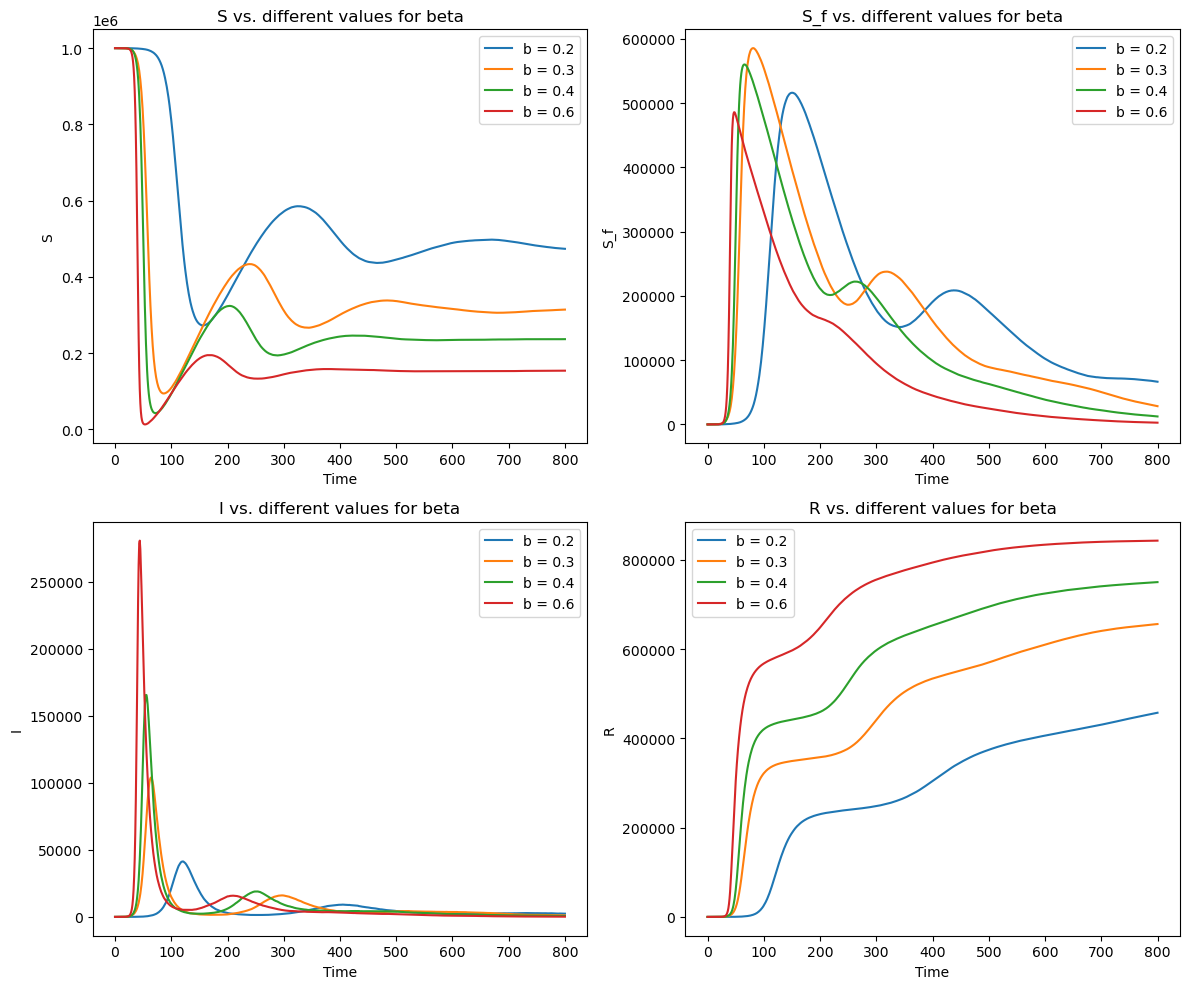

In [17]:
b_values = [0.2, 0.3, 0.4, 0.6]

# Create subplots for each compartment
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for b in b_values:
    # Set the value of b
    init["b"] = b
    
    # Run simulation
    tt, time_series = simulate(init, t_max)
    
    # Plot S vs. time
    axes[0].plot(tt, time_series["S"], label=f'b = {b}')

    # Plot S_f vs. time
    axes[1].plot(tt, time_series["S_f"], label=f'b = {b}')

    # Plot I vs. time
    axes[2].plot(tt, time_series["I"], label=f'b = {b}')

    # Plot R vs. time
    axes[3].plot(tt, time_series["R"], label=f'b = {b}')

# Set labels and titles
axes[0].set(xlabel='Time', ylabel='S', title='S vs. different values for beta')
axes[1].set(xlabel='Time', ylabel='S_f', title='S_f vs. different values for beta')
axes[2].set(xlabel='Time', ylabel='I', title='I vs. different values for beta')
axes[3].set(xlabel='Time', ylabel='R', title='R vs. different values for beta')

# Add legend
axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend()

plt.tight_layout()
plt.show()

## 1. If $ r_{\text{b}} \beta / \mu > 1 $ , then the epidemic size is given by that of an SIR model with $ \beta \to r_{\text{b}} \beta $ 
The statement "Epidemic behaves like SIR with $ \beta \to r_{b} \beta $ means that, in this scenario where fear is not strong enough to halt the epidemic, the model behaves like a standard SIR (Susceptible-Infectious-Recovered) model.

For example in this code we assume: $ r_{\text{b}} = 0.6 $ and $ \beta = 0.8 $ and $ \mu=0.25    $

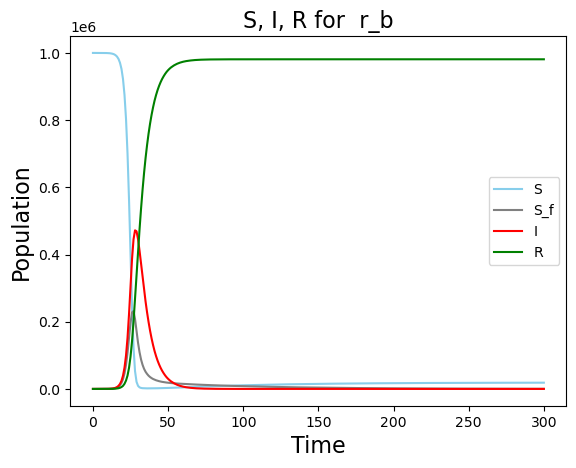

In [49]:
import matplotlib.pyplot as plt
N = int(1e6)
N_sims = 5
t_max = 300
I0 = 1

b    = 0.8
mu   = 0.15
b_f  = 0.5
mu_f = 0.015

frac = 0.001 # only keep runs where the disease reaches more than this fraction of the population

init = {"S": N - I0,
        "S_f": 0,
        "I": I0,
        "R": 0,
        }

step = 10  # for making x-axis less clobbered in plots
fontsize = 16

rng = default_rng()


def simulate(init, t_max, r_b):
    compartments = {"S": init["S"],
                    "S_f": init["S_f"],
                    "I": init["I"],
                    "R": init["R"],
                    }

    time_series = {"S": [init["S"]],
                   "S_f": [init["S_f"]],
                   "I": [init["I"]],
                   "R": [init["R"]],
                   }

    for t in range(0, t_max):
        S, S_f, I, R = list(compartments.values())

        ##### TRANSMISSION PROCESSES #####
        # The convention is dABC for a process A + B -> C + B

        # Disease Transmission for S compartment #
        # S + I -(b)-> I + I
        dSII = rng.binomial(S, b*I/N)

        # Disease Transmission for S_f compartment #
        # S_f + I -(r_b*b)-> I + I
        dS_fII = rng.binomial(S_f, r_b*b*I/N)

        # Fear Transmission #
        # S + I -(b_f)-> S_f + I
        dSIS_f = rng.binomial(S, b_f*I/N)

        # Overcoming the fear after contact with R #
        # S_f + R -(mu_f)-> S + R
        dS_fRS = rng.binomial(S_f, mu_f*R/N)
        

        # Overcoming the fear after contact with S #
        # S_f + S -(mu_f)-> S + S
        dS_fSS = rng.binomial(S_f, mu_f*S/N)

        ##### TRANSITION PROCESSES #####

        # Healing #
        # I -(mu)-> R
        dIR = rng.binomial(I, mu)

        ##################################################################
        #                     # dSII# dS_fII# dSIS_f# dS_fRS# dS_fSS# dIR#
        #                     #     #       #       #       #       #    #
        ##################################################################    
        compartments["S"]   += -dSII         -dSIS_f +dS_fRS +dS_fSS     #
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["S_f"] +=       -dS_fII +dSIS_f -dS_fRS -dS_fSS     #
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["I"]   += +dSII +dS_fII                         -dIR#
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["R"]   +=                                       +dIR#
        #                     #     #       #       #       #       #    #
        ##################################################################

        for key in compartments:
            compartments[key] = np.clip(compartments[key], 0, N)
            time_series[key].append(compartments[key])

        tt = np.linspace(0, t_max, t_max + 1)

    return tt, time_series


# Values of r_b to test
r_b_values = [0.6]

for r_b in r_b_values:
    _, time_series = simulate(init, t_max, r_b)
    plt.plot(_, time_series["S"], label='S', color='skyblue')
    plt.plot(_, time_series["S_f"], label='S_f', color='gray')
    plt.plot(_, time_series["I"], label='I', color='red')
    plt.plot(_, time_series["R"], label='R', color='green')

plt.xlabel('Time', fontsize=fontsize)
plt.ylabel('Population', fontsize=fontsize)
plt.title('S, I, R for  r_b', fontsize=fontsize)
plt.legend()
plt.show()


### As we can observe, the plot exhibits a striking similarity to the SIR model. However, a little arises as we witness a growing trend in the susceptible population after a certain period. 

### What is causing this phenomenon? The explanation lies in the presence of the term $\mu_f$ introduced in this model, as elaborated in this article. 

$ S_f + S \xrightarrow{\mu_f} S + S \$

$\ S_f + R \xrightarrow{\mu_f} S + R \$

### As the value of $\mu$ increases, indicating a shorter infectious period for the disease, it logically follows that the susceptible individuals in the $S_f$ compartment will transition back to the $S$ compartment, and their fear will diminish. Therefore, under previous conditions where we can elevate $\mu$, we observe a more pronounced upward trend in the susceptible population after a certain time period. let's see:
we assume: $ r_{\text{b}} = 0.6 $ and $ \beta = 0.8 $ and $ \mu=0.47    $

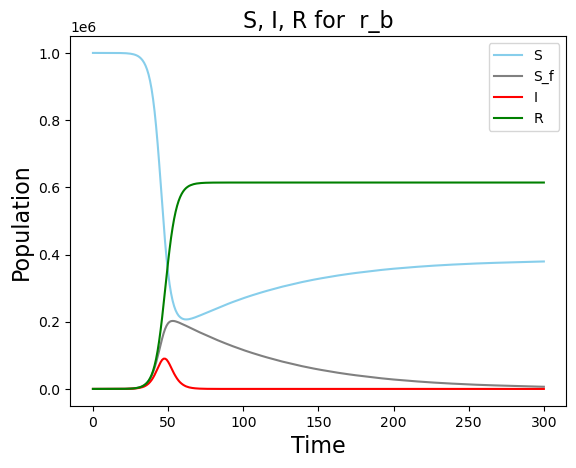

In [16]:
import matplotlib.pyplot as plt
N = int(1e6)
N_sims = 5
t_max = 300
I0 = 1

b    = 0.8
mu   = 0.47
b_f  = 0.5
mu_f = 0.015

frac = 0.001 # only keep runs where the disease reaches more than this fraction of the population

init = {"S": N - I0,
        "S_f": 0,
        "I": I0,
        "R": 0,
        }

step = 10  # for making x-axis less clobbered in plots
fontsize = 16

rng = default_rng()


def simulate(init, t_max, r_b):
    compartments = {"S": init["S"],
                    "S_f": init["S_f"],
                    "I": init["I"],
                    "R": init["R"],
                    }

    time_series = {"S": [init["S"]],
                   "S_f": [init["S_f"]],
                   "I": [init["I"]],
                   "R": [init["R"]],
                   }

    for t in range(0, t_max):
        S, S_f, I, R = list(compartments.values())

        ##### TRANSMISSION PROCESSES #####
        # The convention is dABC for a process A + B -> C + B

        # Disease Transmission for S compartment #
        # S + I -(b)-> I + I
        dSII = rng.binomial(S, b*I/N)

        # Disease Transmission for S_f compartment #
        # S_f + I -(r_b*b)-> I + I
        dS_fII = rng.binomial(S_f, r_b*b*I/N)

        # Fear Transmission #
        # S + I -(b_f)-> S_f + I
        dSIS_f = rng.binomial(S, b_f*I/N)

        # Overcoming the fear after contact with R #
        # S_f + R -(mu_f)-> S + R
        dS_fRS = rng.binomial(S_f, mu_f*R/N)
        

        # Overcoming the fear after contact with S #
        # S_f + S -(mu_f)-> S + S
        dS_fSS = rng.binomial(S_f, mu_f*S/N)

        ##### TRANSITION PROCESSES #####

        # Healing #
        # I -(mu)-> R
        dIR = rng.binomial(I, mu)

        ##################################################################
        #                     # dSII# dS_fII# dSIS_f# dS_fRS# dS_fSS# dIR#
        #                     #     #       #       #       #       #    #
        ##################################################################    
        compartments["S"]   += -dSII         -dSIS_f +dS_fRS +dS_fSS     #
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["S_f"] +=       -dS_fII +dSIS_f -dS_fRS -dS_fSS     #
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["I"]   += +dSII +dS_fII                         -dIR#
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["R"]   +=                                       +dIR#
        #                     #     #       #       #       #       #    #
        ##################################################################

        for key in compartments:
            compartments[key] = np.clip(compartments[key], 0, N)
            time_series[key].append(compartments[key])

        tt = np.linspace(0, t_max, t_max + 1)

    return tt, time_series


# Values of r_b to test
r_b_values = [0.6]

for r_b in r_b_values:
    _, time_series = simulate(init, t_max, r_b)
    plt.plot(_, time_series["S"], label='S', color='skyblue')
    plt.plot(_, time_series["S_f"], label='S_f', color='gray')
    plt.plot(_, time_series["I"], label='I', color='red')
    plt.plot(_, time_series["R"], label='R', color='green')

plt.xlabel('Time', fontsize=fontsize)
plt.ylabel('Population', fontsize=fontsize)
plt.title('S, I, R for  r_b', fontsize=fontsize)
plt.legend()
plt.show()


## 2. If $ r_{\text{b}} \beta / \mu < 1 $ , then fear completely stops the spreading of the disease. (do not discuss, compare with two past)

### Fear completely stops the spreading of the disease.
For example in this code we assume: $ r_{\text{b}} = 0.6 $ and $ \beta = 0.6 $ and $ \mu=0.6   $

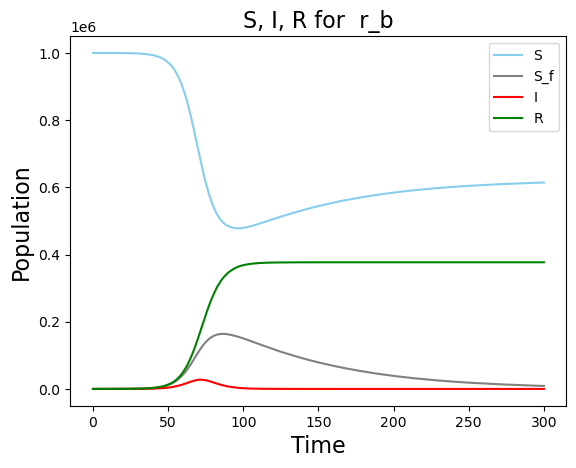

In [101]:
import matplotlib.pyplot as plt
N = int(1e6)
N_sims = 5
t_max = 300
I0 = 1

b    = 0.66
mu   = 0.5
b_f  = 0.5
mu_f = 0.015

frac = 0.001 # only keep runs where the disease reaches more than this fraction of the population

init = {"S": N - I0,
        "S_f": 0,
        "I": I0,
        "R": 0,
        }

step = 10  # for making x-axis less clobbered in plots
fontsize = 16

rng = default_rng()


def simulate(init, t_max, r_b):
    compartments = {"S": init["S"],
                    "S_f": init["S_f"],
                    "I": init["I"],
                    "R": init["R"],
                    }

    time_series = {"S": [init["S"]],
                   "S_f": [init["S_f"]],
                   "I": [init["I"]],
                   "R": [init["R"]],
                   }

    for t in range(0, t_max):
        S, S_f, I, R = list(compartments.values())

        ##### TRANSMISSION PROCESSES #####
        # The convention is dABC for a process A + B -> C + B

        # Disease Transmission for S compartment #
        # S + I -(b)-> I + I
        dSII = rng.binomial(S, b*I/N)

        # Disease Transmission for S_f compartment #
        # S_f + I -(r_b*b)-> I + I
        dS_fII = rng.binomial(S_f, r_b*b*I/N)

        # Fear Transmission #
        # S + I -(b_f)-> S_f + I
        dSIS_f = rng.binomial(S, b_f*I/N)

        # Overcoming the fear after contact with R #
        # S_f + R -(mu_f)-> S + R
        dS_fRS = rng.binomial(S_f, mu_f*R/N)
        

        # Overcoming the fear after contact with S #
        # S_f + S -(mu_f)-> S + S
        dS_fSS = rng.binomial(S_f, mu_f*S/N)

        ##### TRANSITION PROCESSES #####

        # Healing #
        # I -(mu)-> R
        dIR = rng.binomial(I, mu)

        ##################################################################
        #                     # dSII# dS_fII# dSIS_f# dS_fRS# dS_fSS# dIR#
        #                     #     #       #       #       #       #    #
        ##################################################################    
        compartments["S"]   += -dSII         -dSIS_f +dS_fRS +dS_fSS     #
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["S_f"] +=       -dS_fII +dSIS_f -dS_fRS -dS_fSS     #
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["I"]   += +dSII +dS_fII                         -dIR#
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["R"]   +=                                       +dIR#
        #                     #     #       #       #       #       #    #
        ##################################################################

        for key in compartments:
            compartments[key] = np.clip(compartments[key], 0, N)
            time_series[key].append(compartments[key])

        tt = np.linspace(0, t_max, t_max + 1)

    return tt, time_series


# Values of r_b to test
r_b_values = [0.65]

for r_b in r_b_values:
    _, time_series = simulate(init, t_max, r_b)
    plt.plot(_, time_series["S"], label='S', color='skyblue')
    plt.plot(_, time_series["S_f"], label='S_f', color='gray')
    plt.plot(_, time_series["I"], label='I', color='red')
    plt.plot(_, time_series["R"], label='R', color='green')

plt.xlabel('Time', fontsize=fontsize)
plt.ylabel('Population', fontsize=fontsize)
plt.title('S, I, R for  r_b', fontsize=fontsize)
plt.legend()
plt.show()


# Model 2 ) Global, prevalence-based spread of the fear of the disease

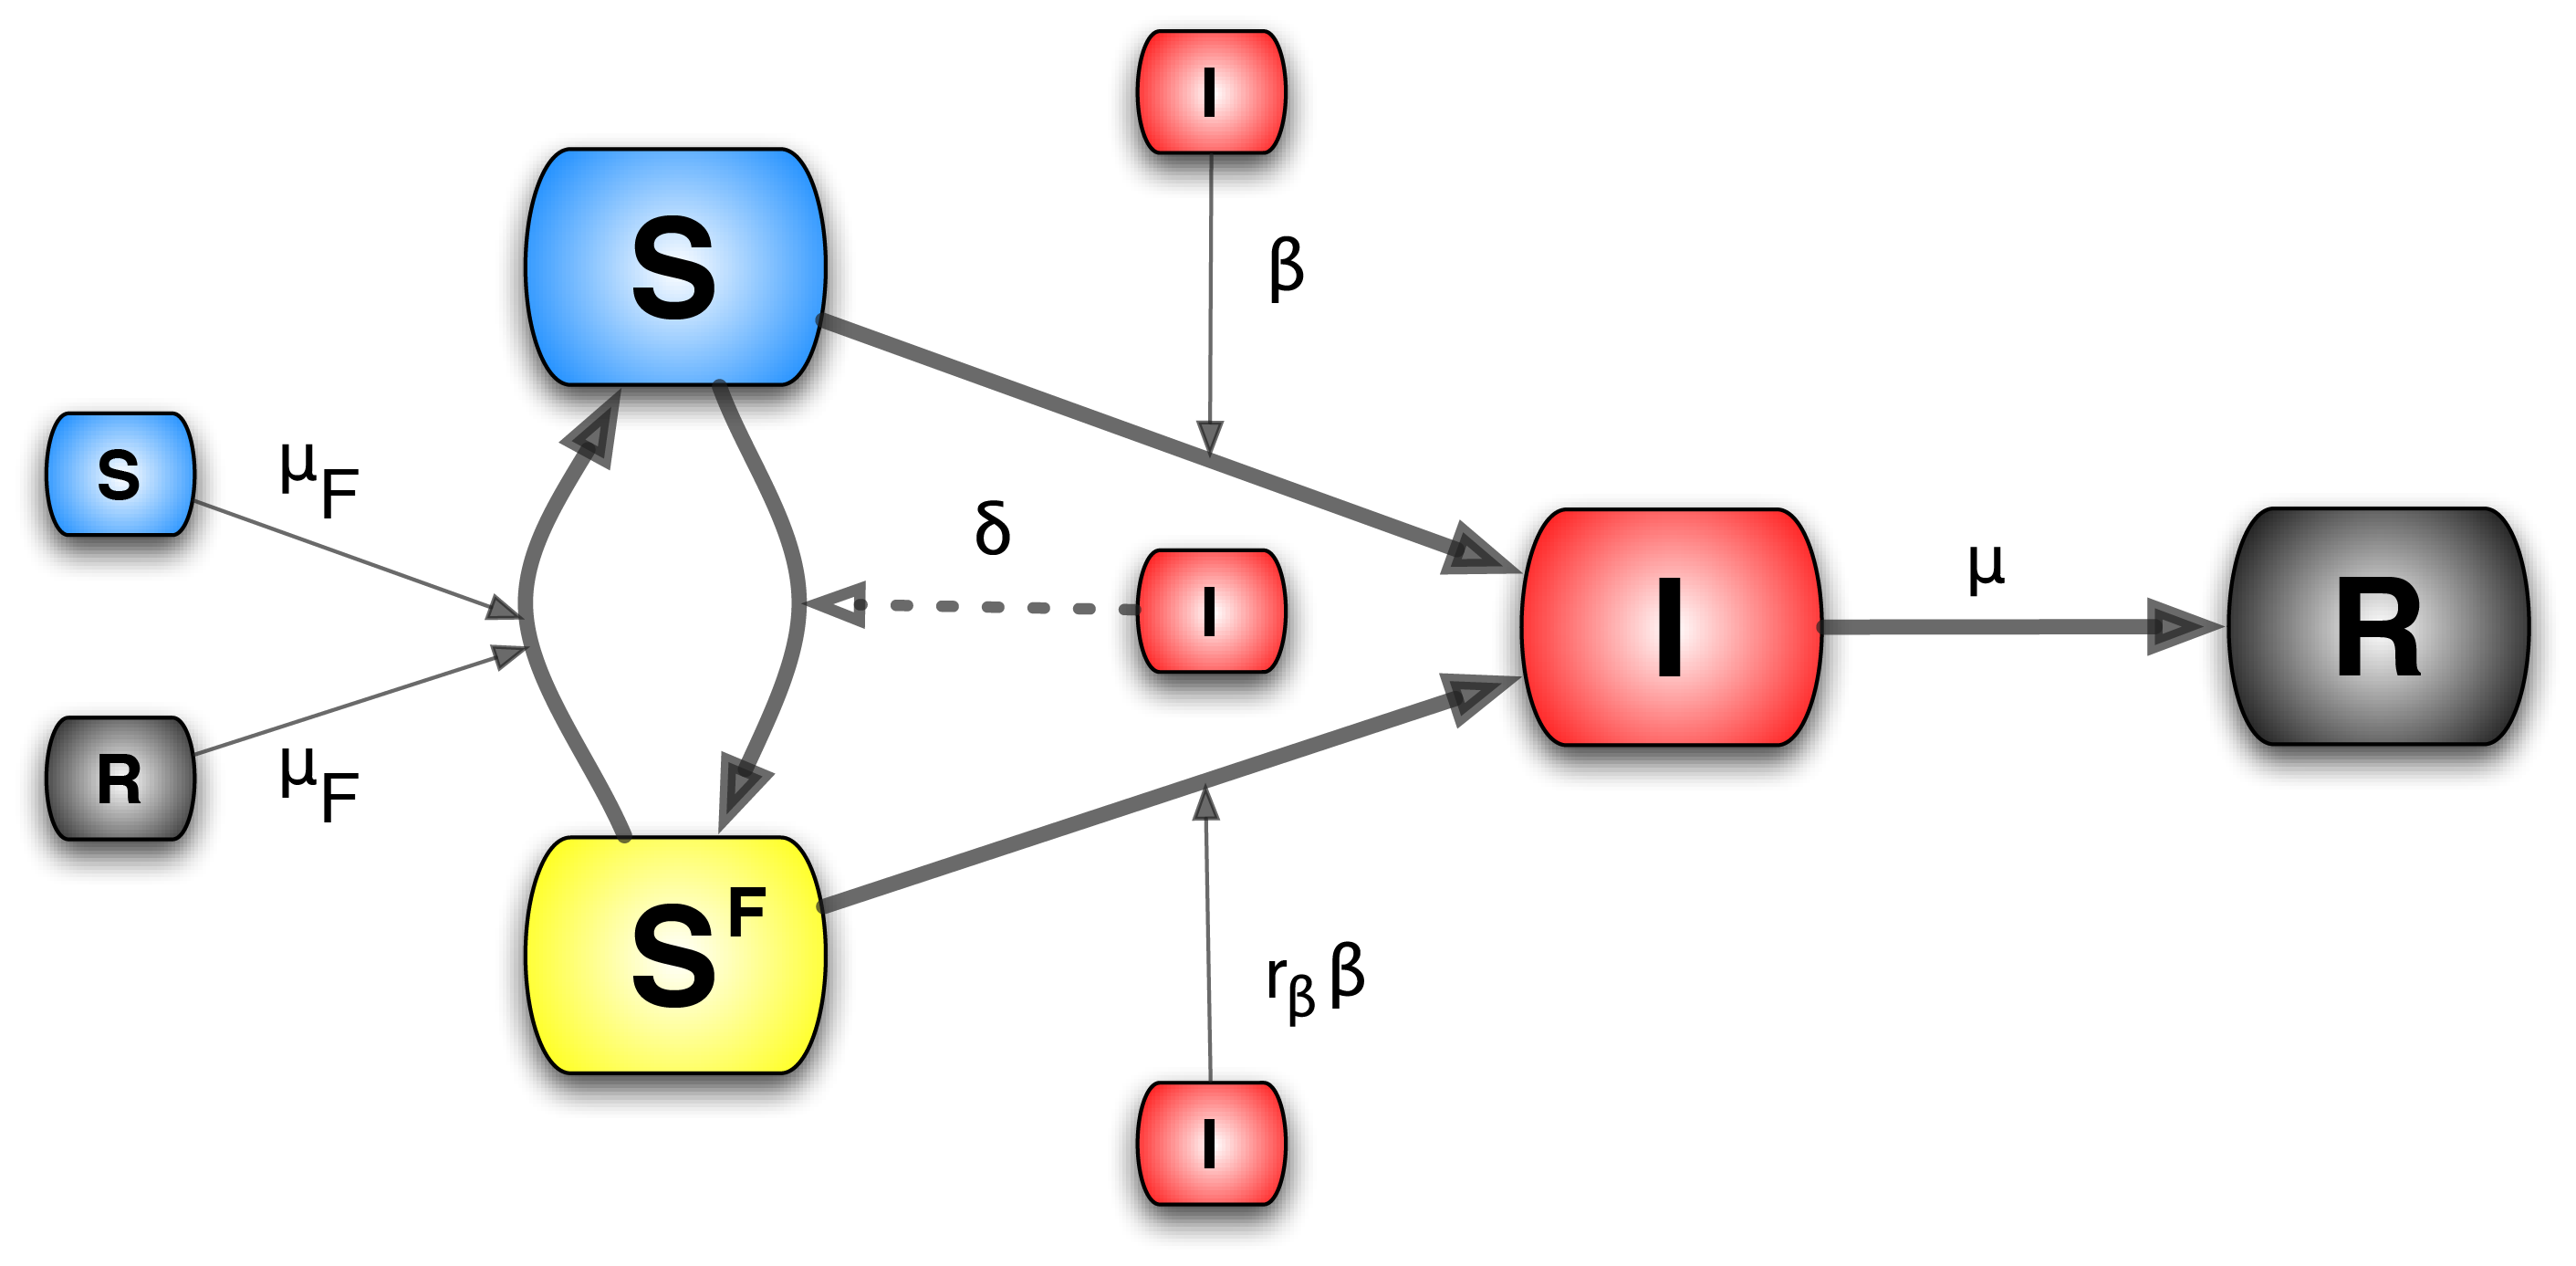

In [25]:
from IPython.display import Image

# Specify the path to your image file
image_path = '2.png'  # Replace with the actual path to your image file

# Display the image
Image(filename=image_path)


In [102]:
N = int(1e6)
N_sims = 5
t_max = 800
I0 = 1

b    = 0.2
mu   = 0.1
r_b  = 0.05
δ = 0.00001
b_f  = 0.7
mu_f = 0.015

frac = 0.001 # only keep runs where the disease reaches more than this fraction of the population

init = {"S"   : N-I0,
        "S_f" : 0,
        "I"   : I0,
        "R"   : 0,
       }

step = 10 # for making x-axis less clobbered in plots
fontsize = 16

rng = default_rng()

In [103]:
def simulate(init, t_max):

    compartments = {"S"  : init["S"],
                    "S_f": init["S_f"],
                    "I"  : init["I"],
                    "R"  : init["R"],
                   }
    
    time_series = {"S"  : [init["S"]],
                   "S_f": [init["S_f"]],
                   "I"  : [init["I"]],
                   "R"  : [init["R"]],
                   }

    for t in range(0, t_max):
        S, S_f, I, R = list(compartments.values())

        ##### TRANSMISSION PROCESSES #####
        # The convention is dABC for a process A + B -> C + B

        
        dSII = rng.binomial(S, b*I/N)


        dS_fII = rng.binomial(S_f, r_b*b*I/N)

     
        dSIS_f = rng.binomial(S, b_f*(1 - np.exp(-(δ*I))))


        dS_fRS = rng.binomial(S_f, mu_f*R/N)

      
        dS_fSS = rng.binomial(S_f, mu_f*S/N)

      
        dIR = rng.binomial(I, mu)

        ##################################################################
        #                    
        #                     #     #       #       #       #       #    #
        ##################################################################    
        compartments["S"]   += -dSII         -dSIS_f +dS_fRS +dS_fSS     #
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["S_f"] +=       -dS_fII +dSIS_f -dS_fRS -dS_fSS     #
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["I"]   += +dSII +dS_fII                         -dIR#
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["R"]   +=                                       +dIR#
        #                     #     #       #       #       #       #    #
        ##################################################################

        for key in compartments:
            compartments[key] = np.clip(compartments[key], 0, N)
            time_series[key].append(compartments[key])

        tt = np.linspace(0, t_max, t_max+1)
        
    return tt, time_series

In [104]:
s_matrix   = np.zeros((N_sims, t_max+1))
s_f_matrix = np.zeros((N_sims, t_max+1))
i_matrix   = np.zeros((N_sims, t_max+1))
r_matrix   = np.zeros((N_sims, t_max+1))

for i, (row_s, row_s_f, row_i, row_r) in enumerate(zip(s_matrix, s_f_matrix, i_matrix, r_matrix)):
    print("{}/{}".format(i+1, len(i_matrix)), end='\r')
    tt, result = simulate(init, t_max)
    
    if(result["R"][-1] >= frac * N): # Only keep runs where the desease reaches a significant fraction of the pupulation
        row_s[:]   = [elem*100/N for elem in result["S"]]
        row_s_f[:] = [elem*100/N for elem in result["S_f"]]
        row_i[:]   = [elem*100/N for elem in result["I"]]
        row_r[:]   = [elem*100/N for elem in result["R"]]

# remove rows that only contain 0
# those coorespond to runs below the threshold
s_matrix = s_matrix[~np.all(s_matrix == 0, axis=1)]
s_f_matrix = s_f_matrix[~np.all(s_f_matrix == 0, axis=1)]
i_matrix = i_matrix[~np.all(i_matrix == 0, axis=1)]
r_matrix = r_matrix[~np.all(r_matrix == 0, axis=1)]

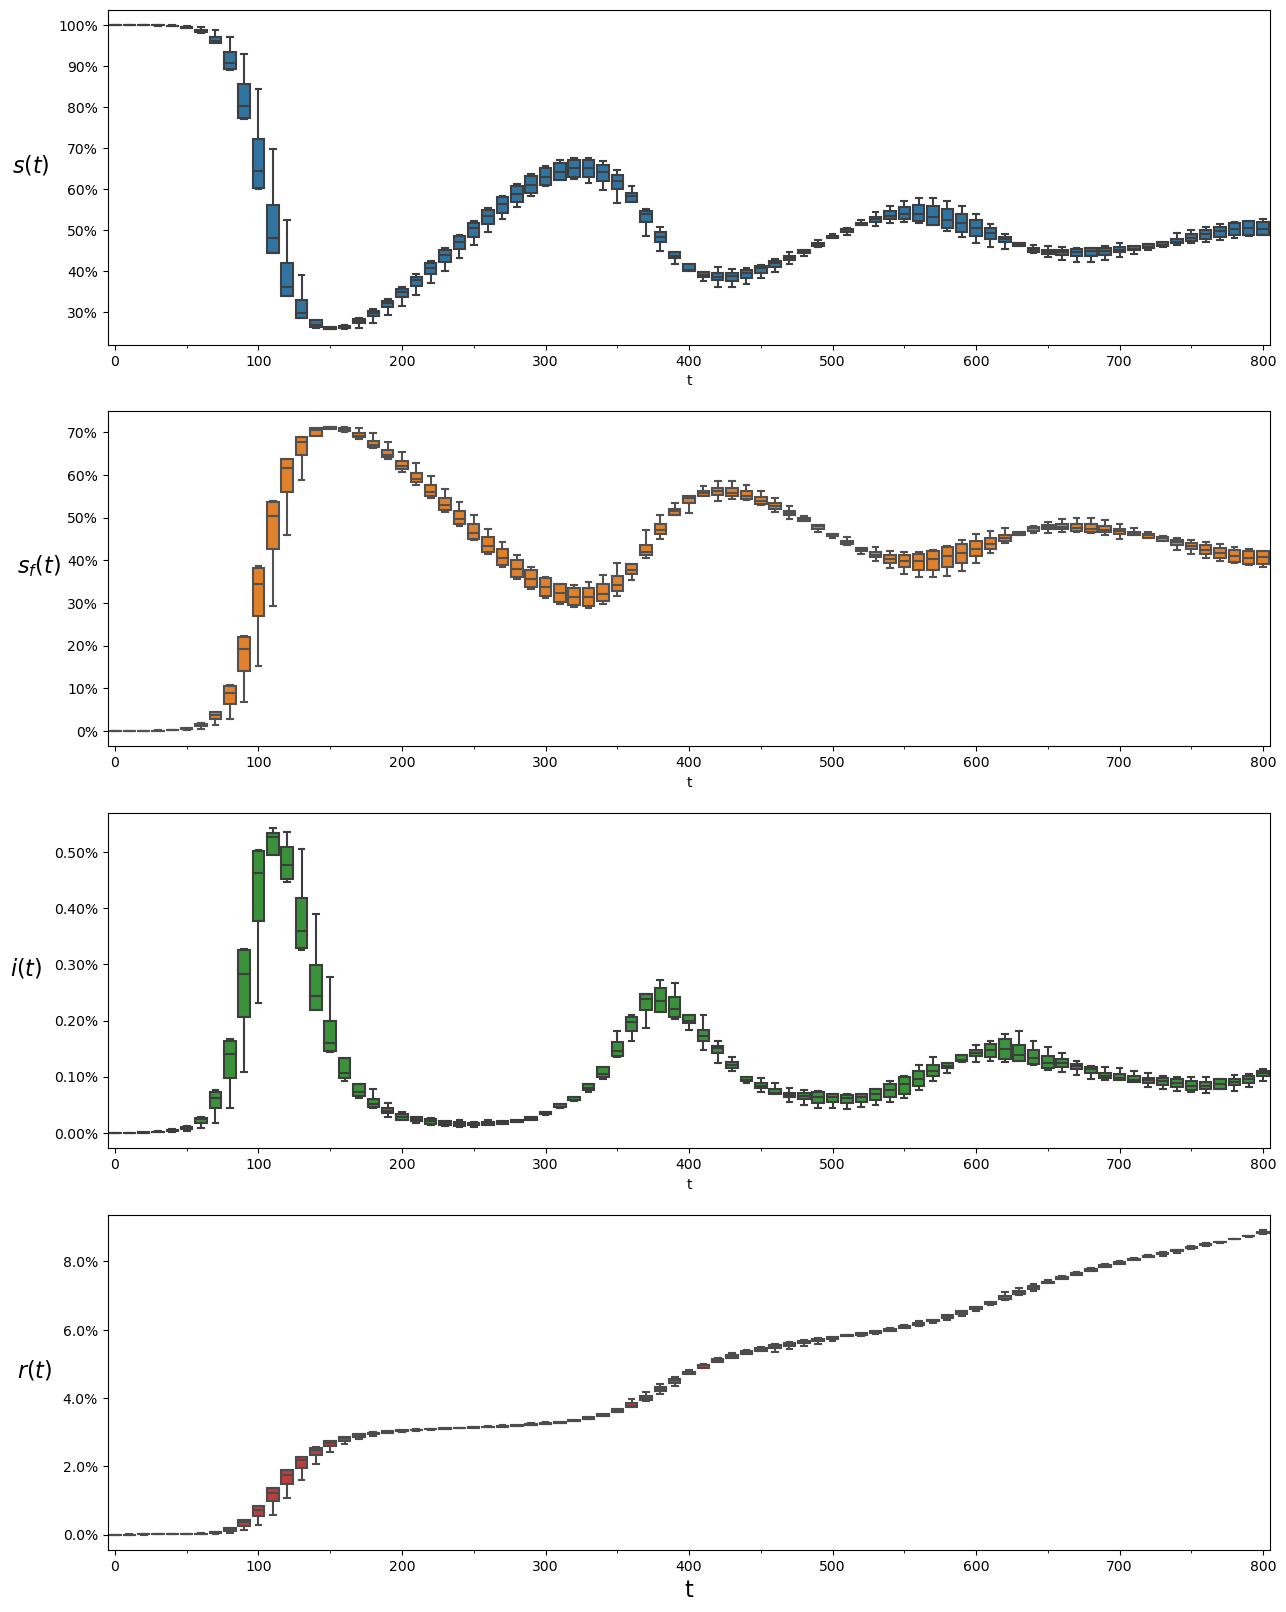

In [105]:
# Visualization

tt = np.linspace(0, t_max, t_max+1)
tt_step = np.array([int(t) for t in tt[::step]])

df_dict = {'t':[],
           's':   [],
           's_f': [],
           'i':   [],
           'r':   [],}

for t in tt_step:
    for (row_s, row_s_f, row_i, row_r) in zip(s_matrix, s_f_matrix, i_matrix, r_matrix):
        df_dict['t'].append(t)
        df_dict['s'].append(row_s[t])
        df_dict['s_f'].append(row_s_f[t])
        df_dict['i'].append(row_i[t])
        df_dict['r'].append(row_r[t])


df = pd.DataFrame(df_dict)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15, 20))

ax4.set_xlabel('$time[days]$', fontsize = fontsize)

boxplot = sns.boxplot(x='t', y='s',   data=df, color="C0", ax=ax1, showfliers = False)
boxplot = sns.boxplot(x='t', y='s_f', data=df, color="C1", ax=ax2, showfliers = False)
boxplot = sns.boxplot(x='t', y='i',   data=df, color="C2", ax=ax3, showfliers = False)
boxplot = sns.boxplot(x='t', y='r',   data=df, color="C3", ax=ax4, showfliers = False)

for ax in (ax1, ax2, ax3, ax4):
    ax.yaxis.set_major_formatter(mtick.PercentFormatter()) #display "%" sign on y axis
    
    ax.xaxis.set_major_locator(mtick.MultipleLocator(10))
    ax.xaxis.set_minor_locator(mtick.MultipleLocator(5))
    
ax1.set_ylabel('$s(t)$', fontsize = fontsize, labelpad = 20).set_rotation(0)
ax2.set_ylabel('$s_f(t)$', fontsize = fontsize, labelpad = 20).set_rotation(0)
ax3.set_ylabel('$i(t)$', fontsize = fontsize, labelpad = 20).set_rotation(0)
ax4.set_ylabel('$r(t)$', fontsize = fontsize, labelpad = 20).set_rotation(0)

plt.show()

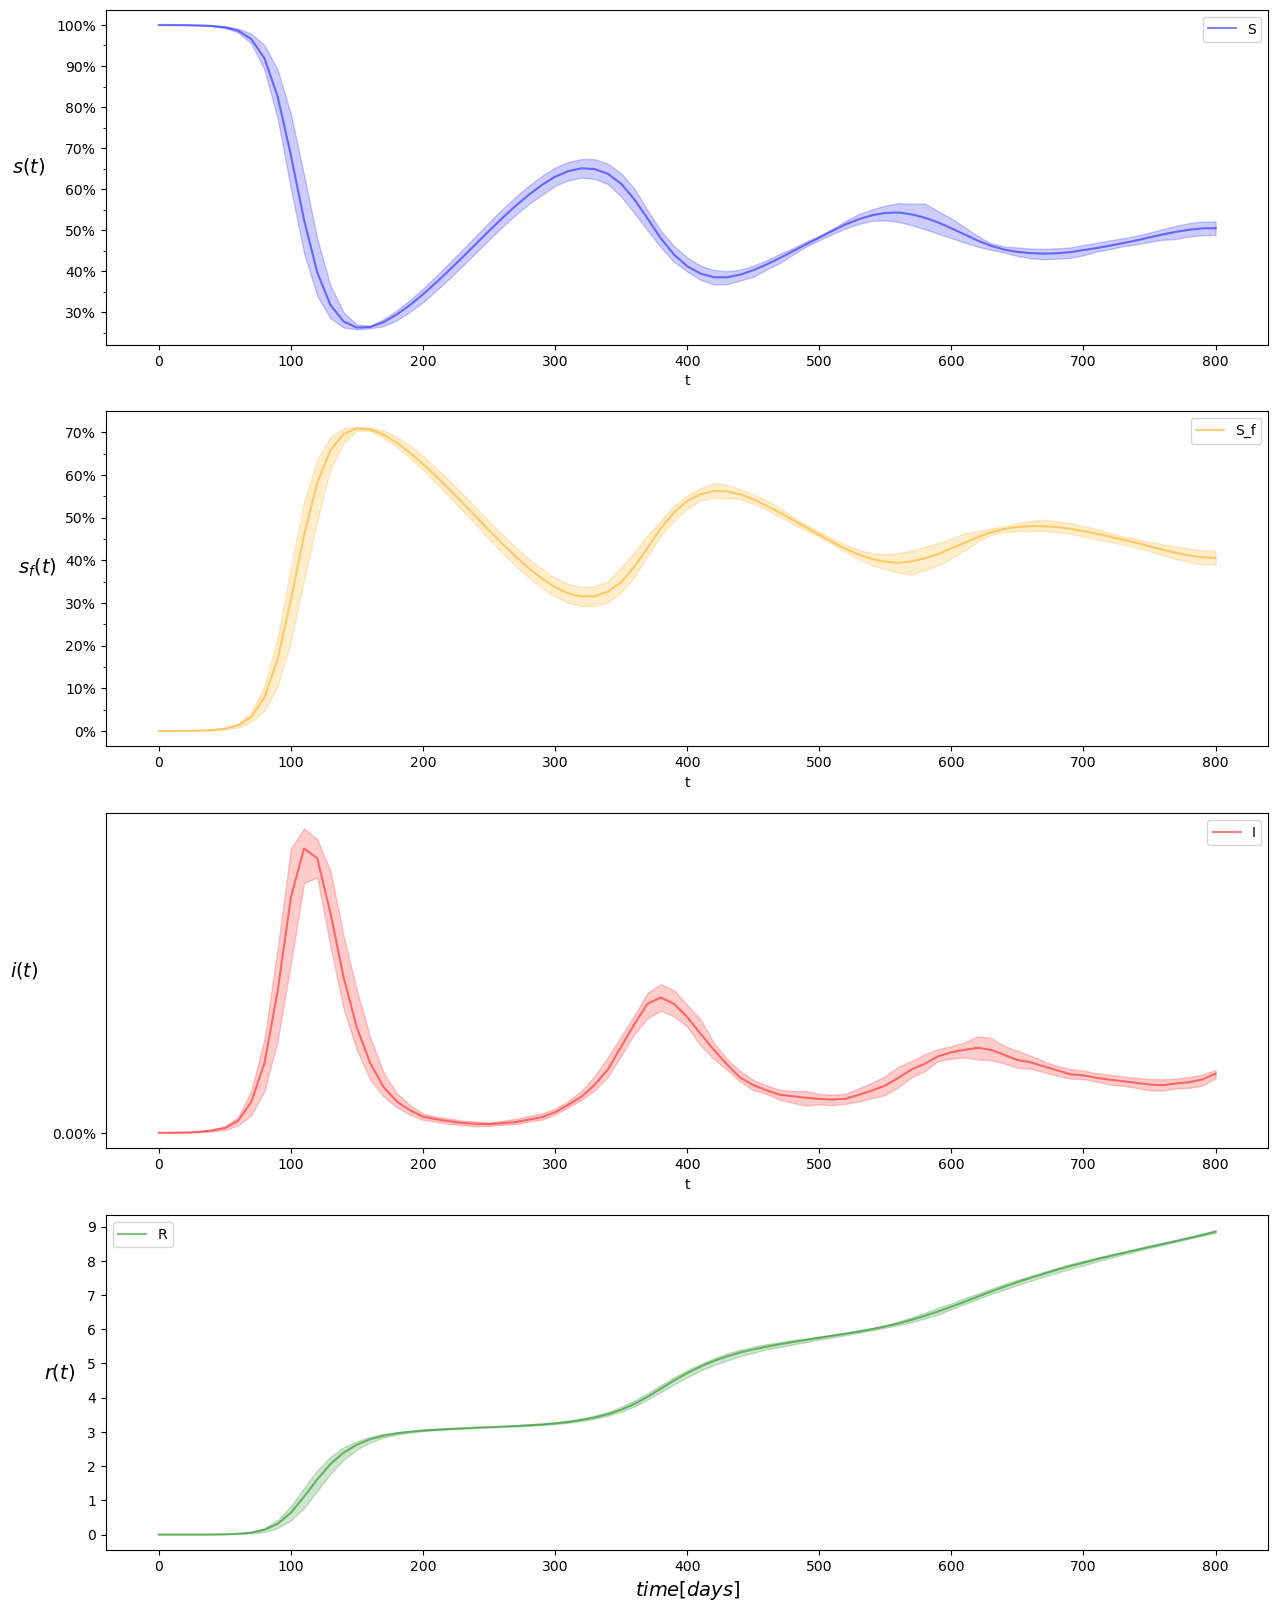

In [106]:
def visualize_results(s_matrix, s_f_matrix, i_matrix, r_matrix, t_max, step):
    tt = np.linspace(0, t_max, t_max + 1)
    tt_step = np.array([int(t) for t in tt[::step]])

    df_dict = {'t': [], 's': [], 's_f': [], 'i': [], 'r': []}

    for t in tt_step:
        for (row_s, row_s_f, row_i, row_r) in zip(s_matrix, s_f_matrix, i_matrix, r_matrix):
            df_dict['t'].append(t)
            df_dict['s'].append(row_s[t])
            df_dict['s_f'].append(row_s_f[t])
            df_dict['i'].append(row_i[t])
            df_dict['r'].append(row_r[t])

    df = pd.DataFrame(df_dict)

    fig, axes = plt.subplots(4, 1, figsize=(15, 20))

    # Plotting lines for each simulation with specified colors
    sns.lineplot(x='t', y='s', data=df, ax=axes[0], alpha=0.5, label='S', color='blue')
    sns.lineplot(x='t', y='s_f', data=df, ax=axes[1], alpha=0.5, label='S_f', color='orange')
    sns.lineplot(x='t', y='i', data=df, ax=axes[2], alpha=0.5, label='I', color='red')
    sns.lineplot(x='t', y='r', data=df, ax=axes[3], alpha=0.5, label='R', color='green')

    # Adding highlights for specific conditions
    highlight_condition = (df['r'] >= frac * N)  # Highlight when R crosses a fraction of the population
    for ax in axes:
        ax.fill_between(df['t'], 0, ax.get_ylim()[1], where=highlight_condition, color='red', alpha=0.3)

        ax.xaxis.set_major_locator(mtick.MultipleLocator(100))  # Set the major locator to 100 days
        ax.legend()

    # Customize y-axis ticks
    for ax in axes[:-1]:
        ax.yaxis.set_major_locator(mtick.MultipleLocator(10))
        ax.yaxis.set_minor_locator(mtick.MultipleLocator(5))
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())

    axes[3].yaxis.set_major_locator(mtick.MaxNLocator(integer=True))
    axes[3].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

    axes[0].set_ylabel('$s(t)$', fontsize=14, labelpad=20).set_rotation(0)
    axes[1].set_ylabel('$s_f(t)$', fontsize=14, labelpad=20).set_rotation(0)
    axes[2].set_ylabel('$i(t)$', fontsize=14, labelpad=20).set_rotation(0)
    axes[3].set_ylabel('$r(t)$', fontsize=14, labelpad=20).set_rotation(0)

    plt.xlabel('$time [days]$', fontsize=14)
    plt.show()

# Example usage:
# Assuming you have already defined s_matrix, s_f_matrix, i_matrix, r_matrix, t_max, and step
visualize_results(s_matrix, s_f_matrix, i_matrix, r_matrix, t_max, step)


# Check the Role of ${\beta}$
Part A) 
The resulting plots provide insights into how different transmission parameters ${\beta}$ impact the evolution of the disease in terms of susceptible individuals, individuals who have overcome fear, infected individuals, and recovered individuals over time.
This code offers a visual representation of the disease dynamics under varying transmission parameters, aiding in the analysis and understanding of the model's behavior.

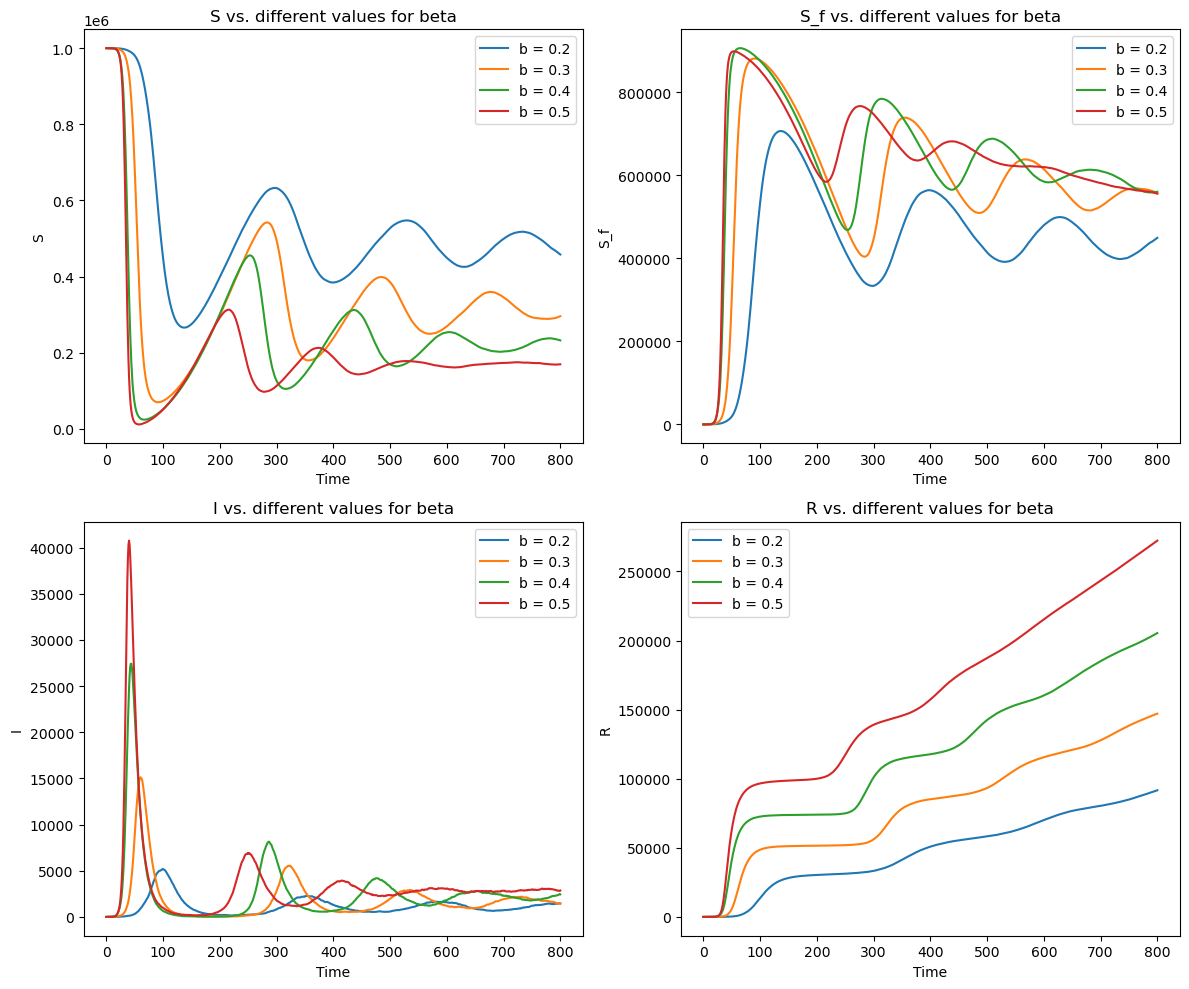

In [110]:
b_values = [0.2, 0.3, 0.4, 0.5]

# Create subplots for each compartment
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for b in b_values:
    # Set the value of b
    init["b"] = b
    
    # Run simulation
    tt, time_series = simulate(init, t_max)
    
    # Plot S vs. time
    axes[0].plot(tt, time_series["S"], label=f'b = {b}')

    # Plot S_f vs. time
    axes[1].plot(tt, time_series["S_f"], label=f'b = {b}')

    # Plot I vs. time
    axes[2].plot(tt, time_series["I"], label=f'b = {b}')

    # Plot R vs. time
    axes[3].plot(tt, time_series["R"], label=f'b = {b}')

# Set labels and titles
axes[0].set(xlabel='Time', ylabel='S', title='S vs. different values for beta')
axes[1].set(xlabel='Time', ylabel='S_f', title='S_f vs. different values for beta')
axes[2].set(xlabel='Time', ylabel='I', title='I vs. different values for beta')
axes[3].set(xlabel='Time', ylabel='R', title='R vs. different values for beta')

# Add legend
axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend()

plt.tight_layout()
plt.show()

## say sth about of the power of media!

# The role of  δ (*)

### As δ increases the transition into fear becomes faster. Since the people in compartment are more protected from the disease, the epidemic size inevitably decreases.

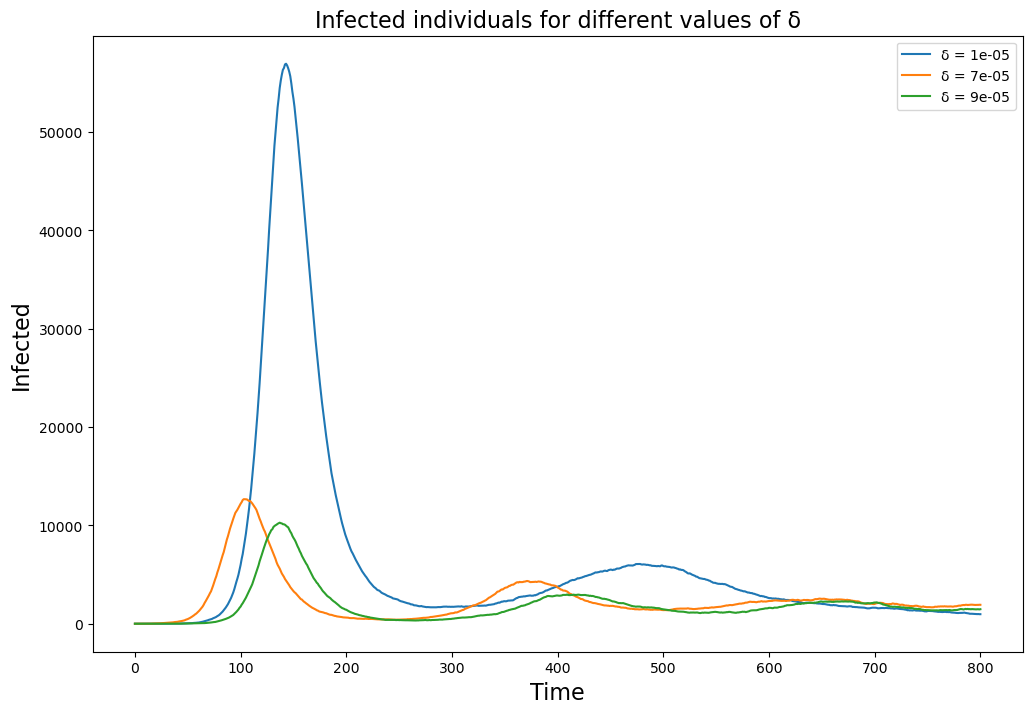

In [134]:
N = int(1e6)
N_sims = 5
t_max = 800
I0 = 1

b = 0.2
mu = 0.1
r_b = 0.05
mu_f = 0.015
b_f = 0.05  # Add b_f parameter

frac = 0.001  # only keep runs where the disease reaches more than this fraction of the population

init = {"S": N - I0,
        "S_f": 0,
        "I": I0,
        "R": 0,
        }

step = 10  # for making x-axis less cluttered in plots
fontsize = 16

rng = default_rng()


def simulate(init, t_max, δ):
    compartments = {"S": init["S"],
                    "S_f": init["S_f"],
                    "I": init["I"],
                    "R": init["R"],
                    }

    time_series = {"S": [init["S"]],
                   "S_f": [init["S_f"]],
                   "I": [init["I"]],
                   "R": [init["R"]],
                   }

    for t in range(0, t_max):
        S, S_f, I, R = list(compartments.values())

        # Disease Transmission for S compartment #
        dSII = rng.binomial(S, b * I / N)

        # Disease Transmission for S_f compartment #
        dS_fII = rng.binomial(S_f, r_b * b * I / N)

        # Fear Transmission #
        dSIS_f = rng.binomial(S, b_f*(1 - np.exp(-(δ*I))))

        # Overcoming the fear after contact with R #
        dS_fRS = rng.binomial(S_f, mu_f * R / N)

        # Overcoming the fear after contact with S #
        dS_fSS = rng.binomial(S_f, mu_f * S / N)

        # Healing #
        dIR = rng.binomial(I, mu)

        # Update compartments
        compartments["S"] += -dSII - dSIS_f + dS_fRS + dS_fSS
        compartments["S_f"] += -dS_fII + dSIS_f - dS_fRS - dS_fSS
        compartments["I"] += dSII + dS_fII - dIR
        compartments["R"] += dIR

        # Clip values to avoid negative populations
        for key in compartments:
            compartments[key] = np.clip(compartments[key], 0, N)
            time_series[key].append(compartments[key])

    tt = np.linspace(0, t_max, t_max + 1)

    return tt, time_series


# Values of δ to test
δ_values = [0.00001,  0.00007, 0.00009]

# Plotting
plt.figure(figsize=(12, 8))

for δ in δ_values:
    _, time_series = simulate(init, t_max, δ)
    plt.plot(_, time_series["I"], label=f'δ = {δ}')

plt.xlabel('Time', fontsize=fontsize)
plt.ylabel('Infected', fontsize=fontsize)
plt.title('Infected individuals for different values of δ', fontsize=fontsize)
plt.legend()
plt.show()


# Model 3) Local, belief-based spread of the fear of the disease 

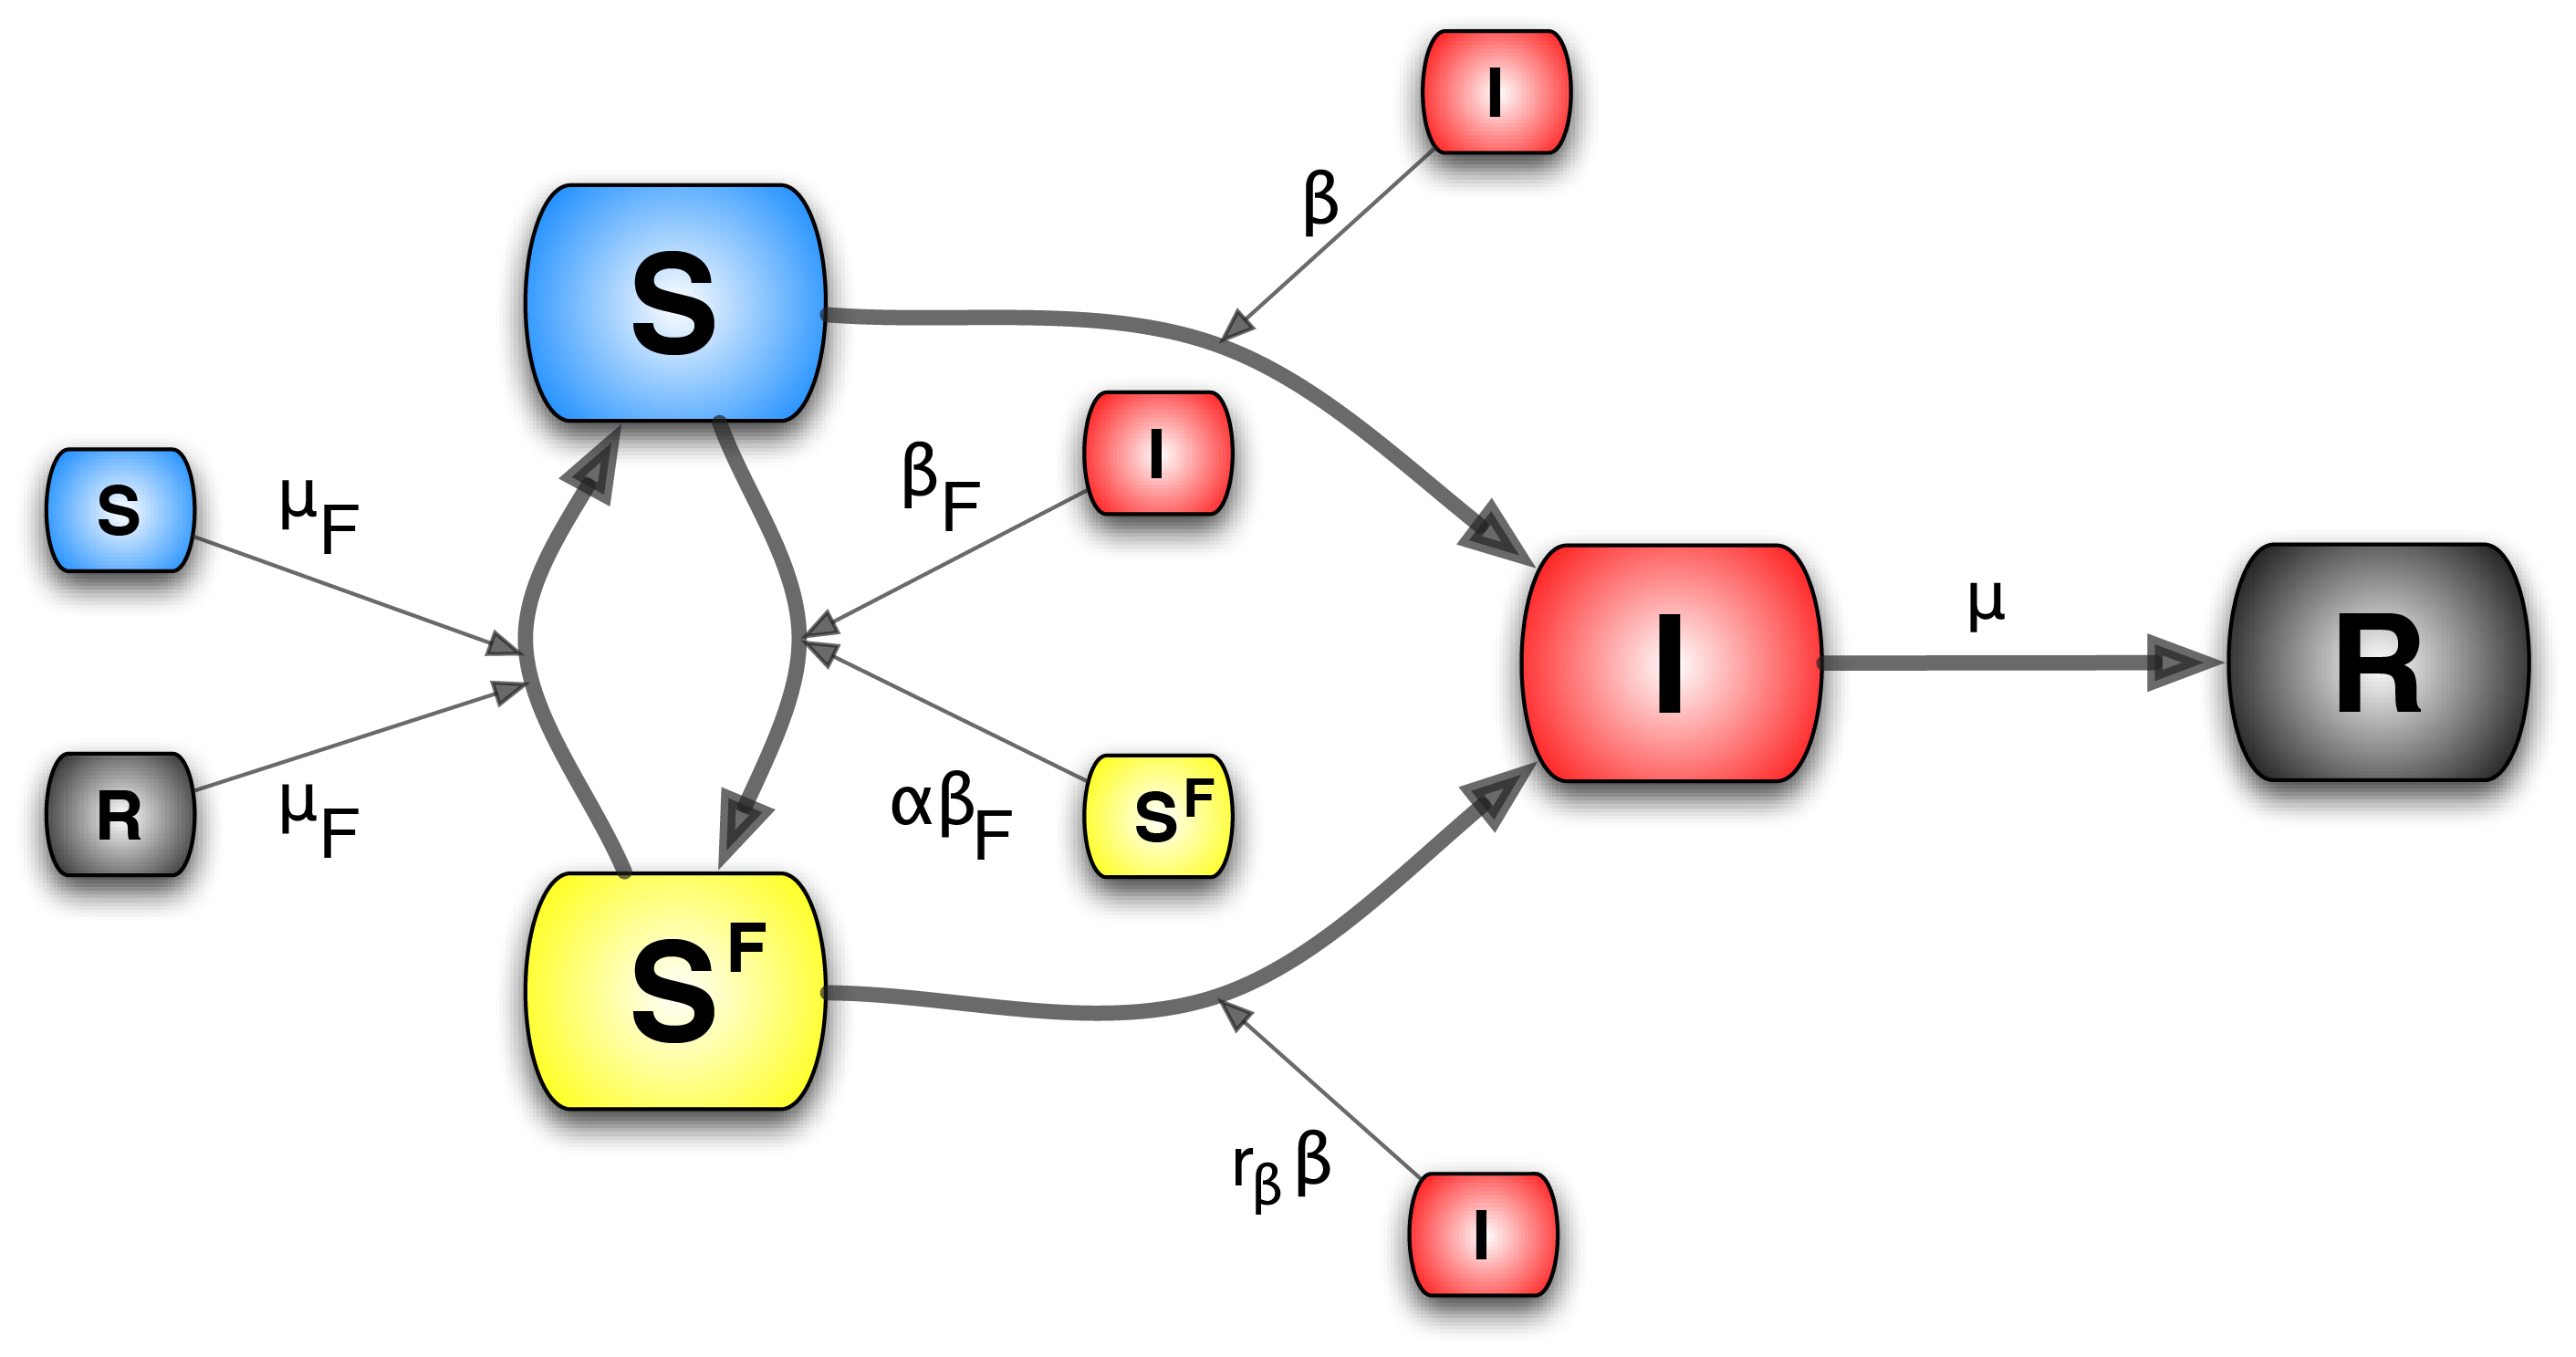

In [49]:
from IPython.display import Image

# Specify the path to your image file
image_path = '3.png'  # Replace with the actual path to your image file

# Display the image
Image(filename=image_path)


In [135]:
N = int(1e6)
N_sims = 5
t_max = 800
I0 = 1

b    = 0.2
mu   = 0.1
r_b  = 0.05
alpha = 0.01
b_f  = 0.7
mu_f = 0.015

frac = 0.001 # only keep runs where the disease reaches more than this fraction of the population

init = {"S"   : N-I0,
        "S_f" : 0,
        "I"   : I0,
        "R"   : 0,
       }

step = 10 # for making x-axis less clobbered in plots
fontsize = 16

rng = default_rng()

In [136]:
def simulate(init, t_max):

    compartments = {"S"  : init["S"],
                    "S_f": init["S_f"],
                    "I"  : init["I"],
                    "R"  : init["R"],
                   }
    
    time_series = {"S"  : [init["S"]],
                   "S_f": [init["S_f"]],
                   "I"  : [init["I"]],
                   "R"  : [init["R"]],
                   }

    for t in range(0, t_max):
        S, S_f, I, R = list(compartments.values())

        ##### TRANSMISSION PROCESSES #####
        # The convention is dABC for a process A + B -> C + B

        dSII = rng.binomial(S, b*I/N)


        dS_fII = rng.binomial(S_f, r_b*b*I/N)


        dSIS_f = rng.binomial(S, b_f*(alpha)*S_f/N)
        

        dSIS_f2 = rng.binomial(S, b_f*I/N)



        dS_fRS = rng.binomial(S_f, mu_f*R/N)


        dS_fSS = rng.binomial(S_f, mu_f*S/N)

        dIR = rng.binomial(I, mu)

        ##################################################################
        #                   
        #                     #     #       #       #       #       #    #
        ##################################################################    
        compartments["S"]   += -dSII         -dSIS_f - dSIS_f2 +dS_fRS +dS_fSS     #
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["S_f"] +=       -dS_fII +dSIS_f +dSIS_f2 -dS_fRS -dS_fSS     #
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["I"]   += +dSII +dS_fII                         -dIR#
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["R"]   +=                                       +dIR#
        #                     #     #       #       #       #       #    #
        ##################################################################

        for key in compartments:
            compartments[key] = np.clip(compartments[key], 0, N)
            time_series[key].append(compartments[key])

        tt = np.linspace(0, t_max, t_max+1)
        
    return tt, time_series

In [137]:
s_matrix   = np.zeros((N_sims, t_max+1))
s_f_matrix = np.zeros((N_sims, t_max+1))
i_matrix   = np.zeros((N_sims, t_max+1))
r_matrix   = np.zeros((N_sims, t_max+1))

for i, (row_s, row_s_f, row_i, row_r) in enumerate(zip(s_matrix, s_f_matrix, i_matrix, r_matrix)):
    print("{}/{}".format(i+1, len(i_matrix)), end='\r')
    tt, result = simulate(init, t_max)
    
    if(result["R"][-1] >= frac * N): # Only keep runs where the desease reaches a significant fraction of the pupulation
        row_s[:]   = [elem*100/N for elem in result["S"]]
        row_s_f[:] = [elem*100/N for elem in result["S_f"]]
        row_i[:]   = [elem*100/N for elem in result["I"]]
        row_r[:]   = [elem*100/N for elem in result["R"]]

# remove rows that only contain 0
# those coorespond to runs below the threshold
s_matrix = s_matrix[~np.all(s_matrix == 0, axis=1)]
s_f_matrix = s_f_matrix[~np.all(s_f_matrix == 0, axis=1)]
i_matrix = i_matrix[~np.all(i_matrix == 0, axis=1)]
r_matrix = r_matrix[~np.all(r_matrix == 0, axis=1)]

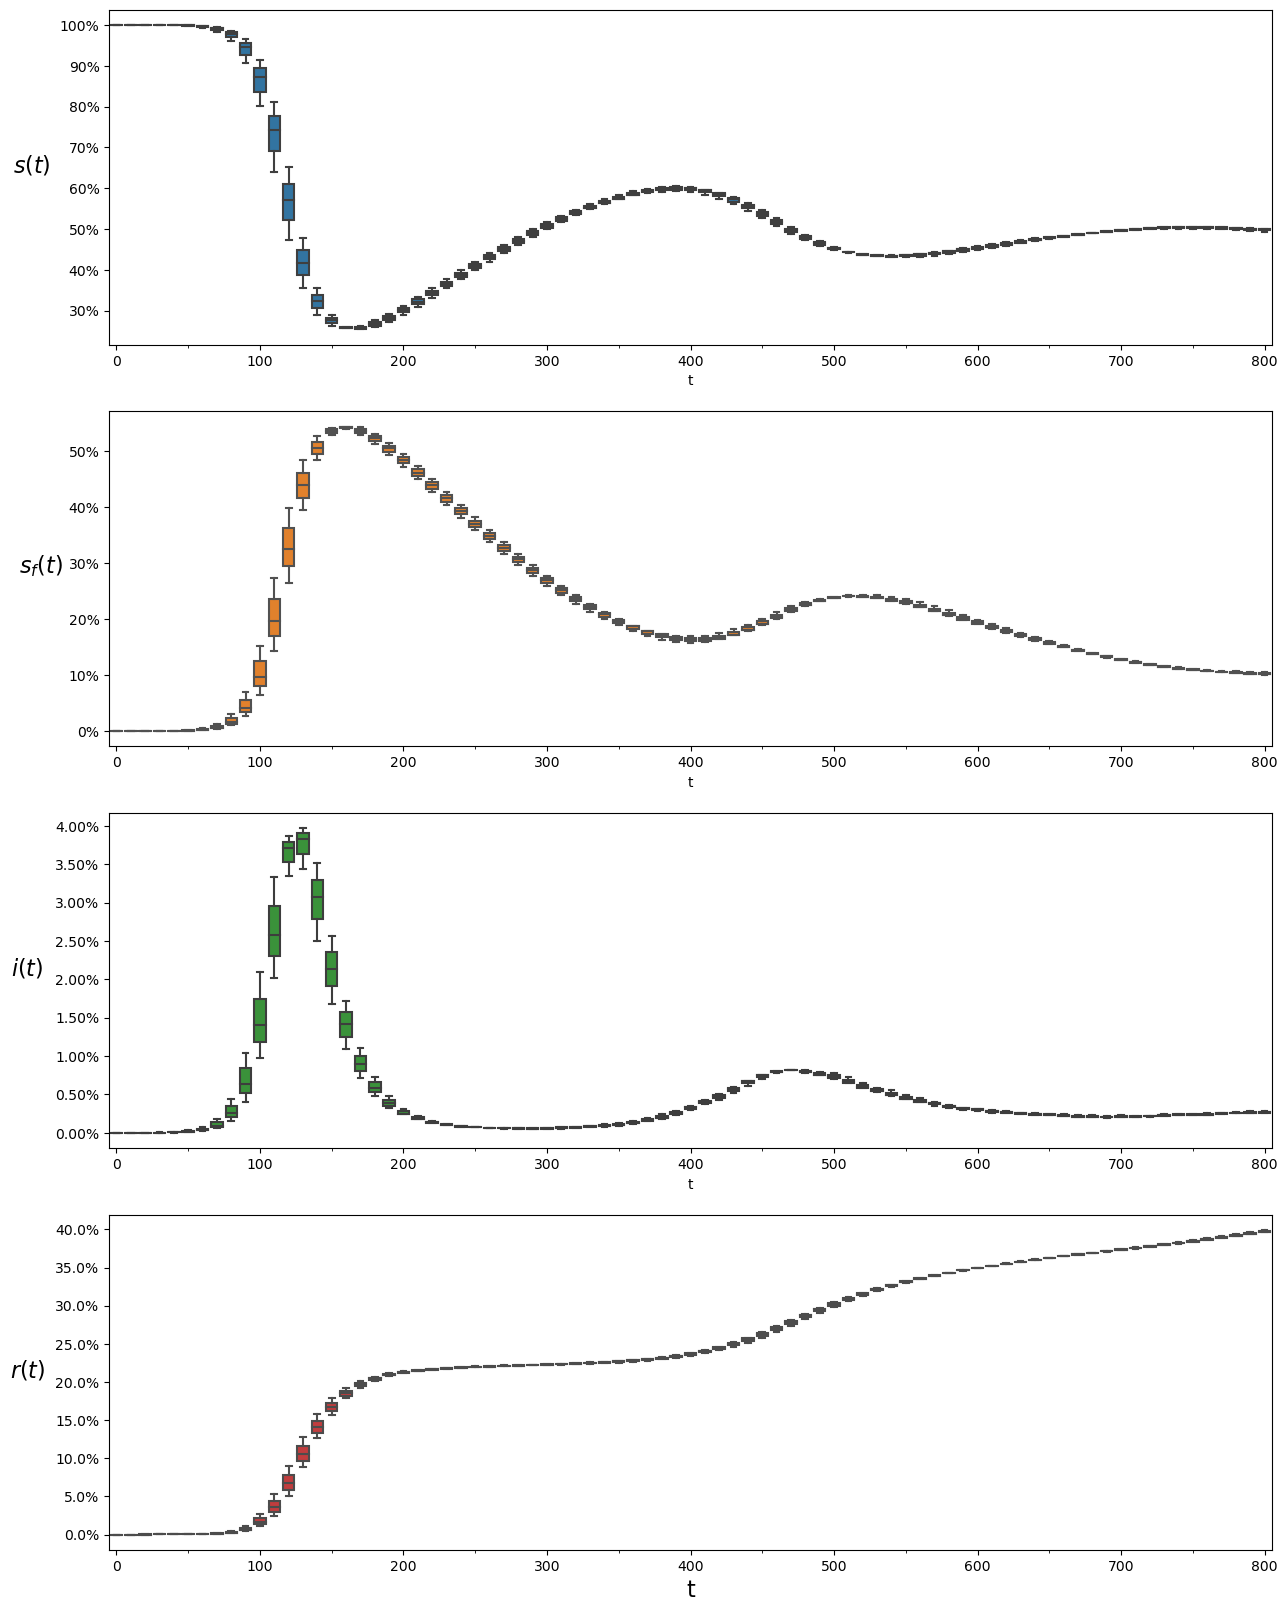

In [138]:
# Visualization

tt = np.linspace(0, t_max, t_max+1)
tt_step = np.array([int(t) for t in tt[::step]])

df_dict = {'t':[],
           's':   [],
           's_f': [],
           'i':   [],
           'r':   [],}

for t in tt_step:
    for (row_s, row_s_f, row_i, row_r) in zip(s_matrix, s_f_matrix, i_matrix, r_matrix):
        df_dict['t'].append(t)
        df_dict['s'].append(row_s[t])
        df_dict['s_f'].append(row_s_f[t])
        df_dict['i'].append(row_i[t])
        df_dict['r'].append(row_r[t])


df = pd.DataFrame(df_dict)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15, 20))

ax4.set_xlabel('$time[days]$', fontsize = fontsize)

boxplot = sns.boxplot(x='t', y='s',   data=df, color="C0", ax=ax1, showfliers = False)
boxplot = sns.boxplot(x='t', y='s_f', data=df, color="C1", ax=ax2, showfliers = False)
boxplot = sns.boxplot(x='t', y='i',   data=df, color="C2", ax=ax3, showfliers = False)
boxplot = sns.boxplot(x='t', y='r',   data=df, color="C3", ax=ax4, showfliers = False)

for ax in (ax1, ax2, ax3, ax4):
    ax.yaxis.set_major_formatter(mtick.PercentFormatter()) #display "%" sign on y axis
    
    ax.xaxis.set_major_locator(mtick.MultipleLocator(10))
    ax.xaxis.set_minor_locator(mtick.MultipleLocator(5))
    
ax1.set_ylabel('$s(t)$', fontsize = fontsize, labelpad = 20).set_rotation(0)
ax2.set_ylabel('$s_f(t)$', fontsize = fontsize, labelpad = 20).set_rotation(0)
ax3.set_ylabel('$i(t)$', fontsize = fontsize, labelpad = 20).set_rotation(0)
ax4.set_ylabel('$r(t)$', fontsize = fontsize, labelpad = 20).set_rotation(0)

plt.show()

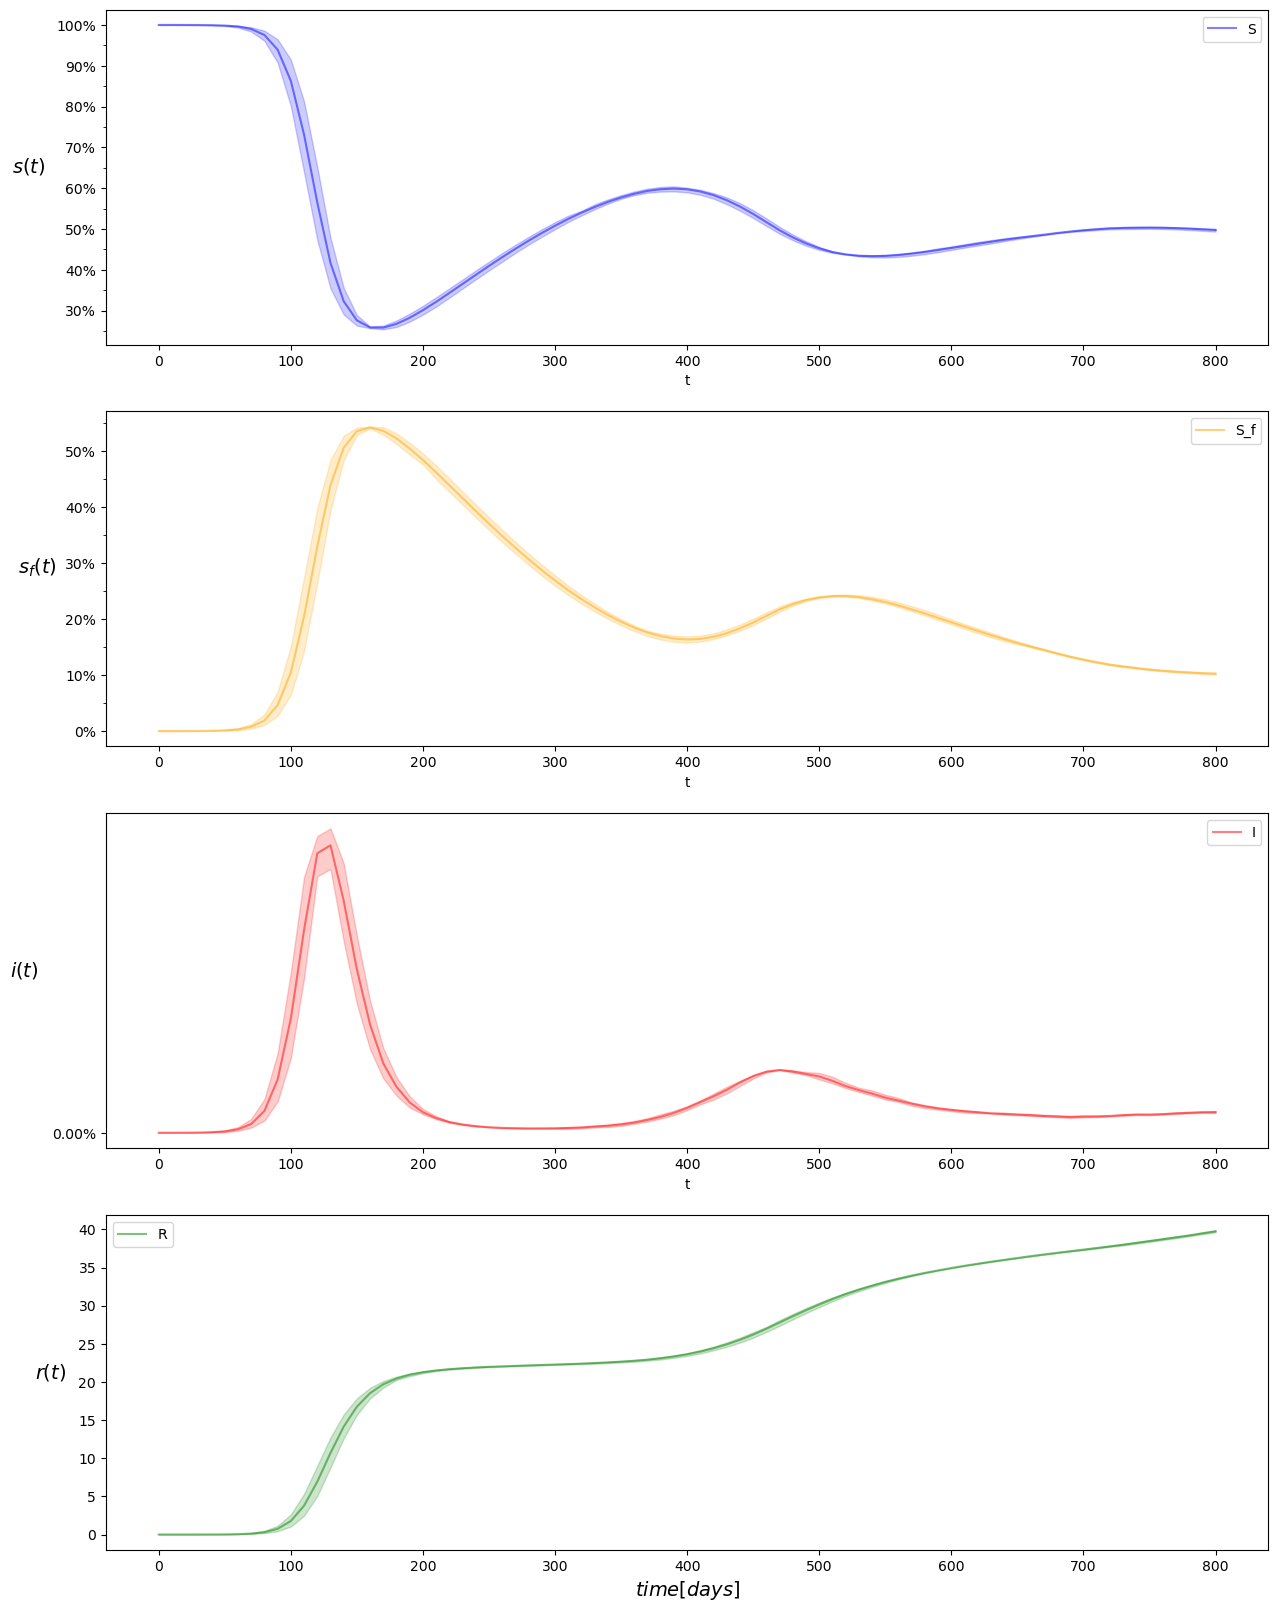

In [139]:
def visualize_results(s_matrix, s_f_matrix, i_matrix, r_matrix, t_max, step):
    tt = np.linspace(0, t_max, t_max + 1)
    tt_step = np.array([int(t) for t in tt[::step]])

    df_dict = {'t': [], 's': [], 's_f': [], 'i': [], 'r': []}

    for t in tt_step:
        for (row_s, row_s_f, row_i, row_r) in zip(s_matrix, s_f_matrix, i_matrix, r_matrix):
            df_dict['t'].append(t)
            df_dict['s'].append(row_s[t])
            df_dict['s_f'].append(row_s_f[t])
            df_dict['i'].append(row_i[t])
            df_dict['r'].append(row_r[t])

    df = pd.DataFrame(df_dict)

    fig, axes = plt.subplots(4, 1, figsize=(15, 20))

    # Plotting lines for each simulation with specified colors
    sns.lineplot(x='t', y='s', data=df, ax=axes[0], alpha=0.5, label='S', color='blue')
    sns.lineplot(x='t', y='s_f', data=df, ax=axes[1], alpha=0.5, label='S_f', color='orange')
    sns.lineplot(x='t', y='i', data=df, ax=axes[2], alpha=0.5, label='I', color='red')
    sns.lineplot(x='t', y='r', data=df, ax=axes[3], alpha=0.5, label='R', color='green')

    # Adding highlights for specific conditions
    highlight_condition = (df['r'] >= frac * N)  # Highlight when R crosses a fraction of the population
    for ax in axes:
        ax.fill_between(df['t'], 0, ax.get_ylim()[1], where=highlight_condition, color='red', alpha=0.3)

        ax.xaxis.set_major_locator(mtick.MultipleLocator(100))  # Set the major locator to 100 days
        ax.legend()

    # Customize y-axis ticks
    for ax in axes[:-1]:
        ax.yaxis.set_major_locator(mtick.MultipleLocator(10))
        ax.yaxis.set_minor_locator(mtick.MultipleLocator(5))
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())

    axes[3].yaxis.set_major_locator(mtick.MaxNLocator(integer=True))
    axes[3].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

    axes[0].set_ylabel('$s(t)$', fontsize=14, labelpad=20).set_rotation(0)
    axes[1].set_ylabel('$s_f(t)$', fontsize=14, labelpad=20).set_rotation(0)
    axes[2].set_ylabel('$i(t)$', fontsize=14, labelpad=20).set_rotation(0)
    axes[3].set_ylabel('$r(t)$', fontsize=14, labelpad=20).set_rotation(0)

    plt.xlabel('$time [days]$', fontsize=14)
    plt.show()

# Example usage:
# Assuming you have already defined s_matrix, s_f_matrix, i_matrix, r_matrix, t_max, and step
visualize_results(s_matrix, s_f_matrix, i_matrix, r_matrix, t_max, step)


# Check the Role of ${\beta}$
Part A) 
The resulting plots provide insights into how different transmission parameters ${\beta}$ impact the evolution of the disease in terms of susceptible individuals, individuals who have overcome fear, infected individuals, and recovered individuals over time.
This code offers a visual representation of the disease dynamics under varying transmission parameters, aiding in the analysis and understanding of the model's behavior.

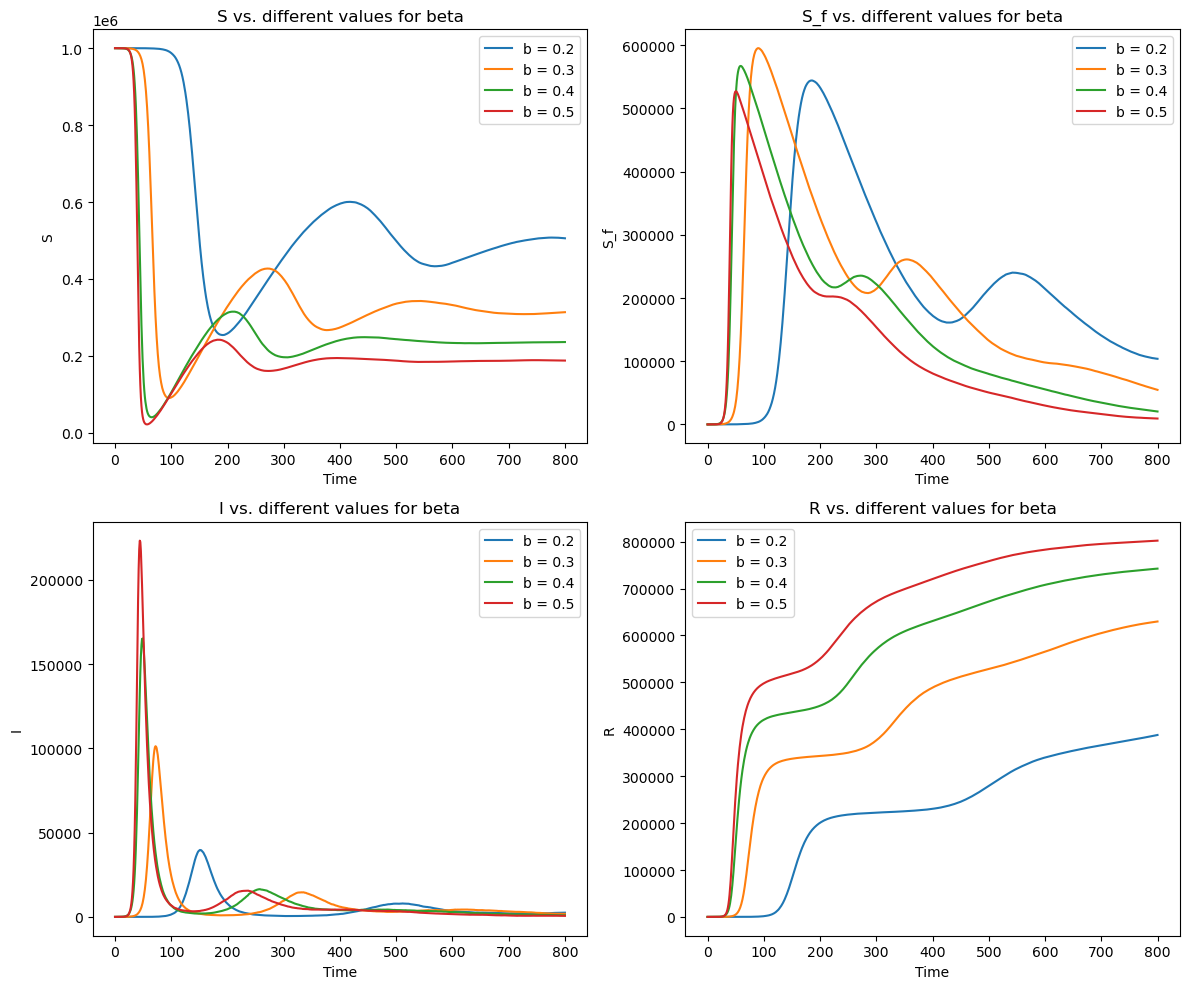

In [140]:
b_values = [0.2, 0.3, 0.4, 0.5]

# Create subplots for each compartment
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for b in b_values:
    # Set the value of b
    init["b"] = b
    
    # Run simulation
    tt, time_series = simulate(init, t_max)
    
    # Plot S vs. time
    axes[0].plot(tt, time_series["S"], label=f'b = {b}')

    # Plot S_f vs. time
    axes[1].plot(tt, time_series["S_f"], label=f'b = {b}')

    # Plot I vs. time
    axes[2].plot(tt, time_series["I"], label=f'b = {b}')

    # Plot R vs. time
    axes[3].plot(tt, time_series["R"], label=f'b = {b}')

# Set labels and titles
axes[0].set(xlabel='Time', ylabel='S', title='S vs. different values for beta')
axes[1].set(xlabel='Time', ylabel='S_f', title='S_f vs. different values for beta')
axes[2].set(xlabel='Time', ylabel='I', title='I vs. different values for beta')
axes[3].set(xlabel='Time', ylabel='R', title='R vs. different values for beta')

# Add legend
axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend()

plt.tight_layout()
plt.show()

# Second article 

In [67]:
N = int(1e7)
N_sims = 3
t_max = 200
I0 = 10
k = 2
b = 0.5
mu = 0.5
δc = 50
gamma = 1 / 6
fd = 0.01

frac = 0.001  # only keep runs where the disease reaches more than this fraction of the population

init = {"S": N - I0,
        "E": 0,
        "I": I0,
        "R": 0,
        "D": 0,
        }

step = 10  # for making x-axis less clobbered in plots
fontsize = 16

rng = default_rng()


def simulate(init, t_max, k):
    compartments = {"S": init["S"],
                    "E": init["E"],
                    "I": init["I"],
                    "R": init["R"],
                    "D": init["D"],
                    }

    time_series = {"S": [init["S"]],
                   "E": [init["E"]],
                   "I": [init["I"]],
                   "R": [init["R"]],
                   "D": [init["D"]],
                   }

    for t in range(0, t_max):
        S, E, I, R, D = list(compartments.values())

        # Disease Transmission for S compartment
        δ = rng.binomial(I, fd * gamma)
        dSII = rng.binomial(S, (b * I / (1 + ((δ / (δc))**k))) / N)

        # Disease Transmission for S_f compartment
        dEII = rng.binomial(E, mu)

        # Overcoming the fear after contact with S
        dR = rng.binomial(I, gamma)

        # Healing
        dD = rng.binomial(I, fd * gamma)

        compartments["S"] += -dSII
        compartments["E"] += dSII - dEII
        compartments["I"] += dEII - dR
        compartments["R"] += dR - dD
        compartments["D"] += dD

        for key in compartments:
            compartments[key] = np.clip(compartments[key], 0, N)
            time_series[key].append(compartments[key])

    tt = np.linspace(0, t_max, t_max + 1)

    return tt, time_series

In [68]:
s_matrix   = np.zeros((N_sims, t_max+1))
e_matrix = np.zeros((N_sims, t_max+1))
i_matrix   = np.zeros((N_sims, t_max+1))
r_matrix   = np.zeros((N_sims, t_max+1))
d_matrix   = np.zeros((N_sims, t_max+1))

for i, (row_s, row_e, row_i, row_r , row_d) in enumerate(zip(s_matrix, e_matrix, i_matrix, r_matrix, d_matrix)):
    print("{}/{}".format(i+1, len(i_matrix)), end='\r')
    tt, result = simulate(init, t_max , k)
    
    if(result["R"][-1] >= frac * N): # Only keep runs where the desease reaches a significant fraction of the pupulation
        row_s[:]   = [elem*100/N for elem in result["S"]]
        row_e[:] = [elem*100/N for elem in result["E"]]
        row_i[:]   = [elem*100/N for elem in result["I"]]
        row_r[:]   = [elem*100/N for elem in result["R"]]
        row_d[:]   = [elem*100/N for elem in result["D"]]

# remove rows that only contain 0
# those coorespond to runs below the threshold
s_matrix = s_matrix[~np.all(s_matrix == 0, axis=1)]
e_matrix = e_matrix[~np.all(e_matrix == 0, axis=1)]
i_matrix = i_matrix[~np.all(i_matrix == 0, axis=1)]
r_matrix = r_matrix[~np.all(r_matrix == 0, axis=1)]
d_matrix = d_matrix[~np.all(d_matrix == 0, axis=1)]

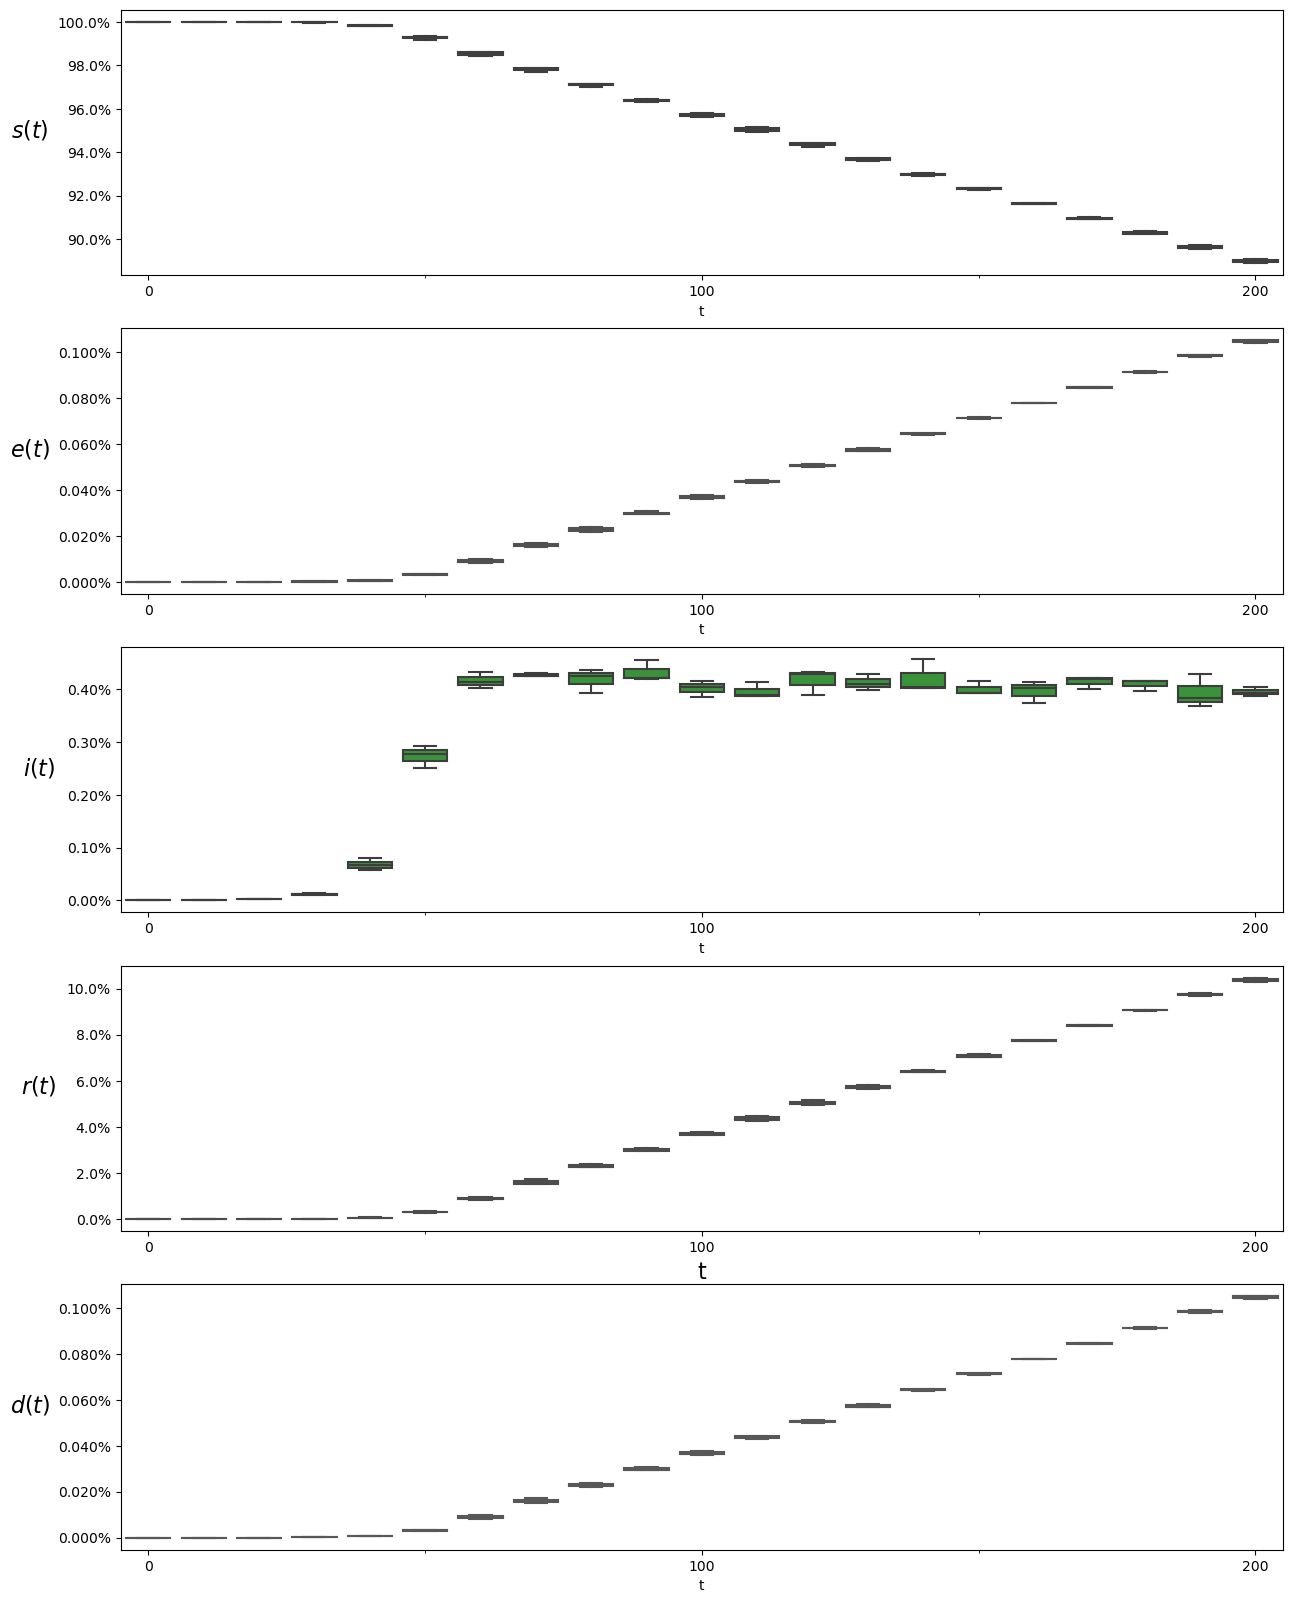

In [69]:
# Visualization

tt = np.linspace(0, t_max, t_max+1)
tt_step = np.array([int(t) for t in tt[::step]])

df_dict = {'t':[],
           's':   [],
           'e': [],
           'i':   [],
           'r':   [],
           'd': [],
          }

for t in tt_step:
    for (row_s, row_e, row_i, row_r, row_d) in zip(s_matrix, e_matrix, i_matrix, r_matrix, d_matrix):
        df_dict['t'].append(t)
        df_dict['s'].append(row_s[t])
        df_dict['e'].append(row_e[t])
        df_dict['i'].append(row_i[t])
        df_dict['r'].append(row_r[t])
        df_dict['d'].append(row_d[t])


df = pd.DataFrame(df_dict)

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1, figsize=(15, 20))

ax4.set_xlabel('$time[days]$', fontsize = fontsize)

boxplot = sns.boxplot(x='t', y='s',   data=df, color="C0", ax=ax1, showfliers = False)
boxplot = sns.boxplot(x='t', y='d', data=df, color="C1", ax=ax2, showfliers = False)
boxplot = sns.boxplot(x='t', y='i',   data=df, color="C2", ax=ax3, showfliers = False)
boxplot = sns.boxplot(x='t', y='r',   data=df, color="C3", ax=ax4, showfliers = False)
boxplot = sns.boxplot(x='t', y='d',   data=df, color="C4", ax=ax5, showfliers = False)

for ax in (ax1, ax2, ax3, ax4, ax5):
    ax.yaxis.set_major_formatter(mtick.PercentFormatter()) #display "%" sign on y axis
    
    ax.xaxis.set_major_locator(mtick.MultipleLocator(10))
    ax.xaxis.set_minor_locator(mtick.MultipleLocator(5))
    
ax1.set_ylabel('$s(t)$', fontsize = fontsize, labelpad = 20).set_rotation(0)
ax2.set_ylabel('$e(t)$', fontsize = fontsize, labelpad = 20).set_rotation(0)
ax3.set_ylabel('$i(t)$', fontsize = fontsize, labelpad = 20).set_rotation(0)
ax4.set_ylabel('$r(t)$', fontsize = fontsize, labelpad = 20).set_rotation(0)
ax5.set_ylabel('$d(t)$', fontsize = fontsize, labelpad = 20).set_rotation(0)

plt.show()

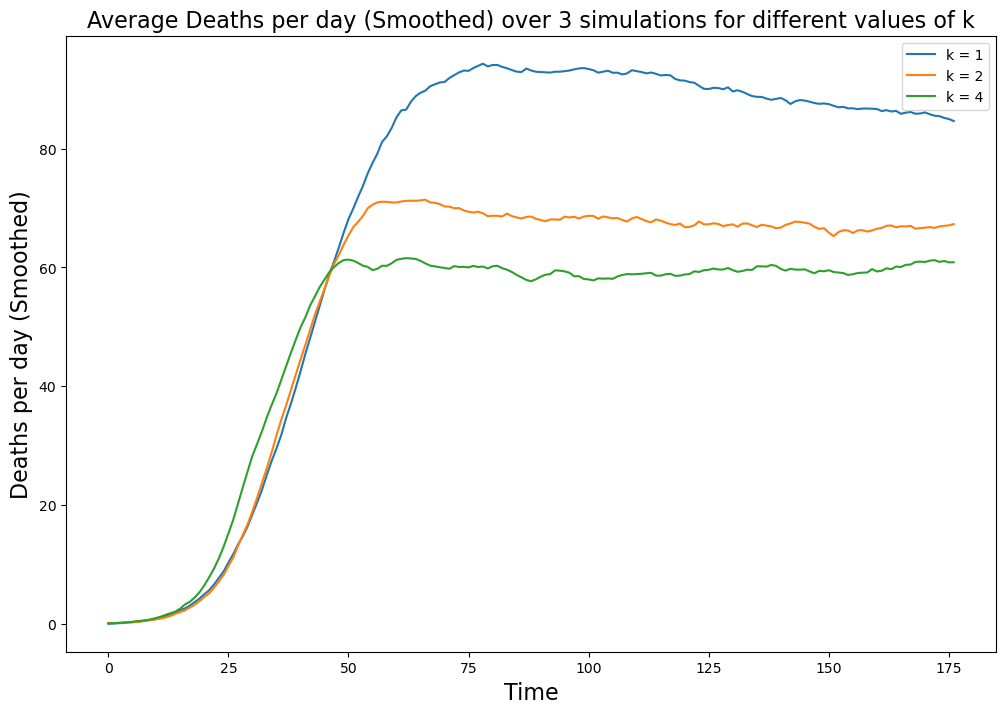

In [74]:
smoothing_window = 25  # Adjust the smoothing window size as needed

# Plotting
plt.figure(figsize=(12, 8))

k_values = [1, 2, 4]

for k in k_values:
    avg_deaths_per_day = np.zeros(t_max + 1)

    for _ in range(N_sims):
        _, time_series = simulate(init, t_max, k)
        total_deaths = np.array(time_series["D"])
        avg_deaths_per_day += np.diff(np.concatenate(([0], total_deaths)))

    avg_deaths_per_day /= N_sims

    # Apply a moving average for smoothing
    smoothed_deaths = np.convolve(avg_deaths_per_day, np.ones(smoothing_window)/smoothing_window, mode='valid')

    time_points = np.arange(t_max + 1)[:len(smoothed_deaths)]
    plt.plot(time_points, smoothed_deaths, label=f'k = {k}')

plt.xlabel('Time', fontsize=fontsize)
plt.ylabel('Deaths per day (Smoothed)', fontsize=fontsize)
plt.title(f'Average Deaths per day (Smoothed) over {N_sims} simulations for different values of k', fontsize=fontsize)
plt.legend()
plt.show()

# S - E - I - R - H - D

In [75]:
N = int(1e7)
N_sims = 3
t_max = 200
I0 = 10
k =2
b = 0.5
mu = 0.5
δc = 50
gamma = 1/6
fd = 0.01
# gamma_h = 1/7


frac = 0.001  # only keep runs where the disease reaches more than this fraction of the population

init = {"S": N - I0,
        "E": 0,
        "I": I0,
        "R": 0,
        "H": 0,
        "D": 0,
        }

step = 10  # for making x-axis less clobbered in plots
fontsize = 16

rng = default_rng()

def simulate(init, t_max,  gamma_h):
    compartments = {"S": init["S"],
                    "E": init["E"],
                    "I": init["I"],
                    "R": init["R"],
                    "H": init["H"],
                    "D": init["D"],
                    }

    time_series = {"S": [init["S"]],
                   "E": [init["E"]],
                   "I": [init["I"]],
                   "R": [init["R"]],
                   "H": [init["H"]],
                   "D": [init["D"]],
                   }

    for t in range(0, t_max):
        S, E, I, R, H, D = list(compartments.values())

        ##### TRANSMISSION PROCESSES #####
        # The convention is dABC for a process A + B -> C + B

        # Disease Transmission for S compartment #
        # S + I -(b)-> I + I
        δ = rng.binomial(time_series["H"][t] , gamma_h) if t > 0 else 0

        dSII = rng.binomial(S,  (b * I / (1 + ((δ/(δc ))**k)) / N ))




        # Disease Transmission for S_f compartment #
        # S_f + I -(r_b*b)-> I + I
        dEII = rng.binomial(E, mu)

        # Overcoming the fear after contact with S #
        # S_f + S -(mu_f)-> S + S
        dR = rng.binomial(I, gamma)

        ##### TRANSITION PROCESSES #####

        # Healing #
        # I -(mu)-> R
        dH = rng.binomial(I, fd * gamma)
        
        dD = rng.binomial(H, gamma_h)

        compartments["S"] += -dSII  #
        compartments["E"] += dSII - dEII  #
        compartments["I"] += dEII - dR  #
        compartments["R"] += dR - dH  #
        compartments["H"] += dH - dD
        compartments["D"] += dD
     #   print(f"Time step {t}: S={compartments['S']}, E={compartments['E']}, I={compartments['I']}, R={compartments['R']}, H={compartments['H']}, D={compartments['D']}")

        for key in compartments:
            compartments[key] = np.clip(compartments[key], 0, N)
            time_series[key].append(compartments[key])

    tt = np.linspace(0, t_max, t_max + 1)

    return tt, time_series



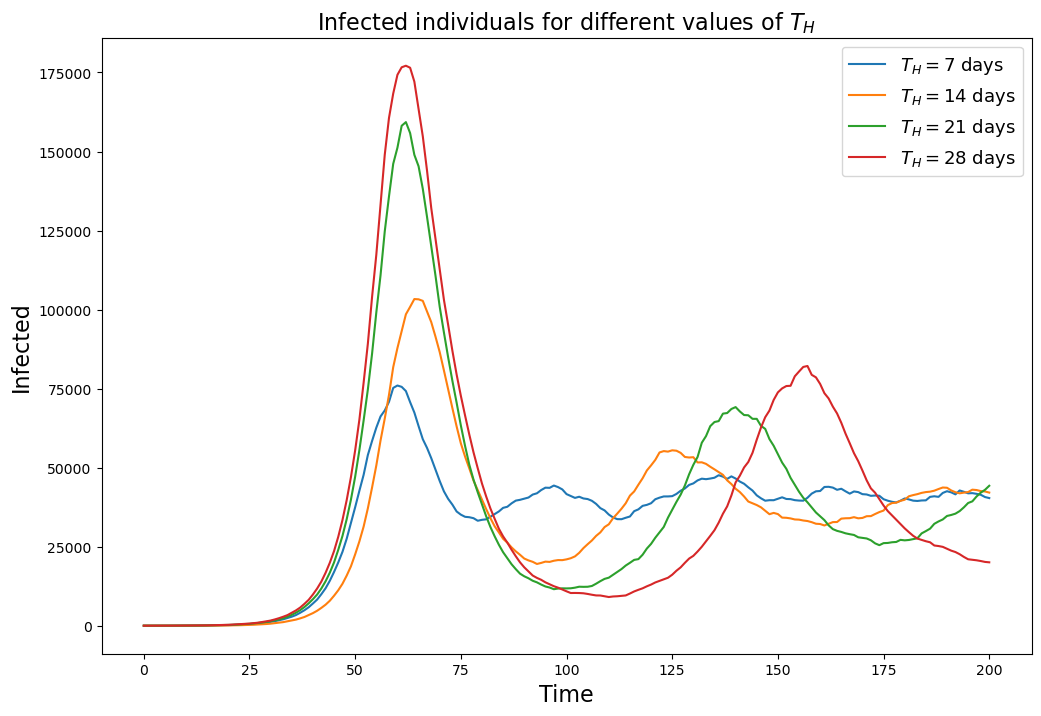

In [76]:
# Plotting
plt.figure(figsize=(12, 8))

gamma_h_values = [1 / 7, 1 / 14, 1 / 21, 1 / 28]

for gamma_h in gamma_h_values:
    _, time_series = simulate(init, t_max, gamma_h)
    plt.plot(_, time_series["I"], label=f'$T_{{H}} = {int(1/gamma_h)}$ days')

plt.xlabel('Time', fontsize=fontsize)
plt.ylabel('Infected', fontsize=fontsize)
plt.title('Infected individuals for different values of $T_{{H}}$', fontsize=fontsize)
plt.legend(loc='upper right', fontsize=13)  # Set fontsize to 'small' for smaller legend
plt.show()

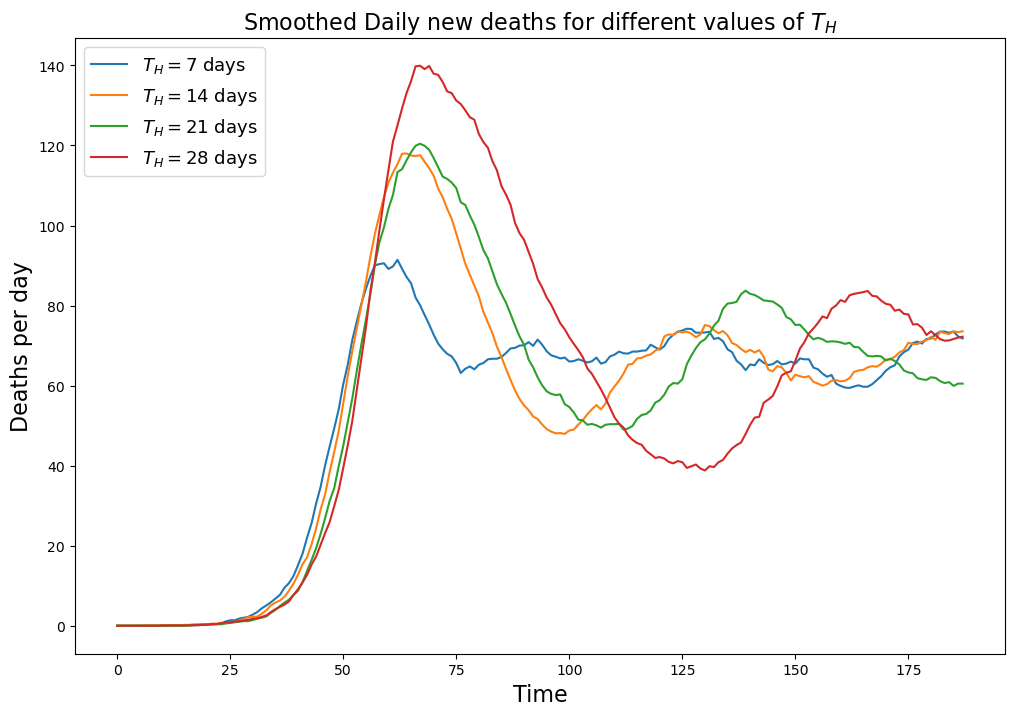

In [77]:
smoothing_window = 14  # Adjust the smoothing window size as needed

# Plotting
plt.figure(figsize=(12, 8))

gamma_h_values = [1 / 7, 1 / 14, 1 / 21, 1 / 28]

for gamma_h in gamma_h_values:
    time_points, time_series = simulate(init, t_max, gamma_h)
    
    # Calculate daily new deaths
    daily_deaths = np.diff(time_series["D"], prepend=0)
    
    # Apply a moving average for smoothing
    smoothed_deaths = np.convolve(daily_deaths, np.ones(smoothing_window)/smoothing_window, mode='valid')
    
    plt.plot(time_points[:len(smoothed_deaths)], smoothed_deaths, label=f'$T_{{H}} = {int(1/gamma_h)}$ days')

plt.xlabel('Time', fontsize=fontsize)
plt.ylabel('Deaths per day', fontsize=fontsize)
plt.title('Smoothed Daily new deaths for different values of $T_{{H}}$', fontsize=fontsize)
plt.legend(loc='upper left', fontsize=13)  # Set fontsize to 'small' for smaller legend
plt.show()